# Expertise in Tuning Particle Accelerators through Network Models of Performance

Most real-world tasks are extremely complex. Imagine the number of possible paths to choose from while driving a car, while trying to solve almost any mathematical problem (let alone, the unsolved ones), to play chess, or to control a particle accelerators. The numbers are so high for any human or any algorithmic agent that they can considered essentially infinite relative to the computational resources we have. But humans are able to perform many complex tasks with relative ease, sometimes without much practice. With practice, we are able to learn and master many more. How do we overcome such insurmountable complexity? What do we actually learn en route to being an "expert" that makes us better?

We know quite a lot about the answers to both questions. We briefly discuss how humans to "compute" what computers cannot compute. We also discuss what they learn en route to expertise. Much less is known about how we do it; more specifically, about the process of overcoming complexity with learning. In other words, we can explain a lot about the states of expertise, but not the process of gaining expertise.

Is there a golden recipe for learning and mastering such tasks? These questions are of interest to all of us, perhaps even more so at this age of AI and Machine Learning (ML). We may fail to see the scope of human excellence and aim to automate tasks that humans would inevitably do a better job than the best possible AI agents. On the other hand, there may lie opportunities to augment and maximize human performance by developing mathematical/AI tools to help us overcome complexity. This way, we may take steps towards human-AI "super"teams for complex tasks.

In this work, we attempt a new approach combining several old approaches. It has been long known that complex tasks have a general structure (Simon, 1962). Complex tasks are generally composed of many relatively simpler task elements or subtasks organized in a hierarchy where the task elements at higher levels serve as the goals for the lower level ones. Therefore, we adopt a direct approach by modeling task performance as networks or graphs of subtasks.

How this approach may help? Scaling complexity has been been the focal interest of many fields -- computer science, artificial and/or computational intelligence, computational complexity, and cognitive psychology. However, it is difficult to study real-world complex tasks with the traditional methods of psychological experimentation for several reasons. For example, running experiments in active workplaces where the opportunity costs of stopping work far exceeds research funds. Moreover, the experimenters would not have not much control over the depth or the amount of data that can be collected, a main reason being security issues. On the other hand, there are often archived data in large amounts after decades of digitization.

In this work, we use the network-based approach to study an extremely complex task -- Operating particle accelerators. We build the networks using the electronic logs created by the operators about an important task at the control room -- tuning the Free Electron LASER (FEL). To tune the FEL, an operator requires working with at least 27 different sets of parameters. We modeled operator performance in tuning the FEL as networks of these 27 sets of tuning parameters.

To note, in reality, these sets of parameters can be further divided into parts and constructing networks from them. However, even with the 27 task elements, there are $27! \approx 1.1 \times 10^{28}$ ways to order the elements. In terms of how many ways the 27 task elements can be partitioned or divided into subsets, there are $\approx 5.5\times10^{20}$ different ways. Clearly, exhaustive search through this many options are beyond the abilities of any human or computational algorithm we know of. Therefore, FEL tuning with 27 task elements provides a sufficiently complex paradigm to see human brilliance in learning complex tasks.


<!-- As a result, we have many mathematical methods to study how "intelligent" agents deal with complexity, and how they differ. There are many possible dimensions or Degrees of Freedom -- using the terms a bit loosely -- to observe differences in performance. We can study the differences between human and AI agents, changes with learning or in time, similarities and differences across individuals. In this study, we combine several mathematical methods together to develop a "pipeline" for raw text data to task/performance networks. Methods are kept modular; that is, they can be modified or replaced based on available data and questions to answer. -->
<!-- 
### Outline:

First we briefly discuss some notable and well-established findings about human expertise in complex tasks (e.g., in chess, in solving physics problems (+ if needed, Air traffic control + Eye gaze in complex tasks)) and how humans store information accumulated (spoiler: very selectively, in chunks and sometimes as heuristics) and how humans solve complex problems and the rationality in complex problems. We also discuss some learning theories (e.g., power law of learning, feature learning, instance-based learning) and existing ways to investigate complex task performance and learning (such as, mental models and concept maps). Then we discuss the details of our methods. After that, the particle accelerator task we studied in this work. After that the results, then discussion, ... -->

### Purposes of the network models

    Provides a high level summary of interconnected subtasks
    Allows investigating the networks at different levels of granularity. 
        The importance of each element in the networks
        The interconnections between elements
        The clusters or communities of elements are more closely connected to each other than other parts of the networks.
        The whole networks
    
    In this work, we examine expertise in operating particle accelerators at all these levels.

    How this approach may be helpful? For complex tasks, different part-task trainings have been helpful, sometimes even in accommodating intelligence differences. But an often observed only when the parts are at least remotely independent. Accurate representations may help identify expertise related differences. Moreover, the network models themselves may be helpful for the users. For example, domain experts would be able interpret the networks accurately and quickly and novices may find the information to learn with less effort and time.

### Steps to develop network models of tuning performance from Elog dataset
![](data_files/misc_for_notebooks/Flowchart_data_to_networks.jpg)

Figure 1: *A schematic of the processes used to develop network models from the text data in the elog database*



In [7]:
# from numba import jit, cuda
# import os
# print (os.getcwd())
# exit()
import requests
import time
import datetime
import numpy as np
import pandas as pd
import json
import copy
import re
import string
import random
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# nltk things
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
for corpus_name in ["words", "stopwords", "names"]:
    try:
        nltk.data.find('corpora/%s'%corpus_name)
    except LookupError:
        # nltk.download('punkt')
        print("Downloading: ", corpus_name)
        nltk.download(corpus_name)

from nltk.corpus import words, stopwords, names, wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

import networkx as nx

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 12})

# import seaborn as sns
# sns.set_palette("colorblind")
import math
import re
from collections import Counter, OrderedDict
import itertools
from itertools import chain

from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score

# import torch
# from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

from nlp_and_network_analysis_functions_by_RR import *

In [8]:
# plot_network_measures(G_list[0], A_list[0], to_savefig = 0)

# Functions

All functions are included in a python code with this notebook. The reason to keep them separate is to tidy up this notebook a bit. Below is a list of functions we will use. The functions in the python files are also organized in the sets mentioned here. Later in this notebook, we describe these functions as we use them in investigating operator expertise.  

<a name = "text_functions_label"></a>
## Set 1: Functions for Text processing
Divided into two parts

1. Functions for data clean up
    remove numbers, remove punctuations, email ids, urls
2. Functions for the similarity metrics
3. Function to download data from OSF.io if not in local storage

<a name = "nlp_functions_label"></a>
## Function Set 2: Natural Language Processing

In this step, we filter the data for various reasons.

1. min_word_cutoff filtering: We inlcude an option to select entries with a minimum number of words requirement.
2. LSA ( = TF-IDF vectorization + SVD)
3. Classifying entries relevant to tuning, based on cosine similarity, and
4. Classifying tuning parameters used in process ("likely knobs" in code) based on cosine similarity.

More details about these steps can be found in this [section](#nlp_discussion_label) of the notebook.

<a name = "network_functions_label"></a>
## Function Set 3: Network Analysis, Visualizations, and Bootstrapping tests
<!-- 1. for networks
2. for subsetting entries most relevent to tuning task, based on similarity to the whole tuning article.
3. for determining the likely knobs -->

1. Adjacency matrices\
    -- Adjacency matrices from edge data (0 or 1 for edge weights)\
    -- Adjacency matrices based on similarity scores between two nodes (continous edge weights between 0 and 1)
    -- ...
2. Community Detection\
    -- G-N algorithm\
    -- Spectral Clustering
3. Distances between graphs/networks (three measures)
4. Network visualizations(all together)

5. Bootstrapping tests

# -------- (START OF MAIN CODE) --------------------

# Load or Download Preprocessed Data
    (and process some more)
    
<u> **1. The Elog dataset**</u>

The **agg_df** datafile that contains all of the ~350K original entries we had downloaded. We have already removed the Personal Identifiable Information (PIIs) from this version. The entries span 14 years, between the start of 2009 and the end of 2022. The dataset can be downloaded from this [osf storage](https://osf.io/qmt2x/). In this notebook, the dataset is downloaded from the storage the link if not available in local storage.

<u> Step 1: Data Cleaning</u>
        
We combine the title texts and the main texts into single pieces of text per entry. We clean these entries by removing unwanted information as listed below, so that all we are left with only the text from the elogs.

1. duplicates (by elog id),
2. objects (tables -- but keeping their content, images),
3. urls,
4. email ids,
5. punctuations (including "." --> affects decimal points),
6. stopwords (aka frequent but less informative words like the articles)
7. all "pure" numbers as words (e.g., -2, 1.2) but not alphanumeric characters (e.g., BC1, TD11)

<u> Step 2: Remove PII </u>

The dataset was cleaned and de-identified with two steps (and several substeps) of preprocessing.

Step 2a: We replace author information with participant ids (e.g., "p1", "p2", "p3"). We also keep the machine logs, with their ids marked with "m" (e.g., "m1", "m2", "m3"). We also calculate the participants' experience at the time of making the entries.

Step 2b: Remove PII from texts
We have split the text into its words. Some of these words are potentially PII that we want to remove. We retrieved information on all active SLAC employees from SLAC addressbook and searched for names, and usernames (which also takes care of the email ids, but we had taken out email ids before anyway).

Summary:
We succesfully removed most PIIs by replacing them with arbitrarily codes. As a few names are also english/meaningful words potentially informative for our analysis (e.g., low, Muon, Watt, April, May), some selected words were not replaced. But we found their proportion is quite small relative to the whole dataset.

------

<u> **2 & 3. MCC Wiki Articles on FEL Tuning**</u>

We also perform the data cleaning processes in STEP 1 on two articles on tuning from the MCC Wikipages. These wiki articles are a part of training material for new operator and a conveniently available information resource to use in controlling the accelerators. In this work, we will use the two wiki articles as references to search for entries related to FEL tuning.

2. detailed_tuning_article = The "12 knobs" article by Howard Smith, a very experienced operator who wrote a detailed and instructive article on tuning. This article divides the tuning task into 27 different sets of parameters and elaborately discusses the means and the goals --> related GUIs, controls, and feedbacks to use in setting the parameters to desired levels of ranges.

3. generic_tuning_article -- The "Generic knobs" article which is a concise version of the 12 knobs article that divides the task into 7 frequent and 7 infrequent parameters. Descriptions are much less detailed compared to the 12 knobs article.

------

<u> **4 & 5. Some Labeled Elog Entries for relevance to FEL tuning**</u>

Finally, we also load two sets of elog entries labeled by another accelerator expert for relevance to FEL tuning. Each set contains 100 entries.

4. ldf1 -- set 1
5. ldf2 -- set 2

In [9]:
# ------------------------- LOAD NECESSARY DATA  -----------------------------------
# ----------------------------------------------------------------------------------

def func_download_agg_data_from_osf():
	time_start = time.time()
	try:
		import wget
	except ImportError:
		!pip install wget
		import wget

	import zipfile

	time_start = time.time()
	url_to_elog_data = "https://files.osf.io/v1/resources/qmt2x/providers/osfstorage/?zip="
	elog_file = wget.download(url_to_elog_data)
	zipped_datafile = zipfile.ZipFile(elog_file, "r")
	zipped_datafile.extractall()
	zipped_datafile.close()
	print("Data Downloaded from osf.io. Time taken: %i seconds"%(time.time()-time_start))

# -------------- (1) GENERATE or LOAD agg_df for all Elog entries ------------------

# new_test_run = 1

# new_run_from_step_2 = 0
num_batches = 355
elog_ids_all = []

try:
	agg_df = pd.read_pickle("data_files/elog_data/agg_data2_pii_removed_pickle.txt")
except FileNotFoundError:
	func_download_agg_data_from_osf()
	agg_df = pd.read_pickle("data_files/elog_data/agg_data2_pii_removed_pickle.txt")


print("agg df containing all Elog entries loaded, Version: Cleaned and de-identified")

# ---------------- Some more data preparation  ------------------------------------
	# We represent the text data in different forms that would be useful.
agg_df["all_text_as_vec"] = agg_df.all_text_in_words.apply(Counter)
agg_df["all_text_as_doc"] = agg_df.all_text_in_words.apply(lambda x: " ".join(x)) # Convert to one piece of text
agg_df["num_words"] = agg_df.all_text_in_words.apply(len)


print(agg_df.shape)
print(agg_df.columns)
print("\n\n")

# Now we we have the elogs
# Next we load the articles on the Tuning task
# Then we will load the labeled datasets we have.
# Finally, we may need to update the tf idfs in step 5. But we may not need it anymore.

# --------------- (2) Generic knobs article as text --------------------------------

with open("data_files/data_from_wiki_articles/concise_tuning_whole_text.txt", 'r') as file:
	concise_tuning_text = file.read().replace('\n', '')
concise_tuning_text_in_words = remove_stopwords_from_wordlist_RR(remove_punc_and_word_tokenize_RR(concise_tuning_text))
concise_tuning_text_in_words = [elem for elem in concise_tuning_text_in_words if not is_number(elem)]
concise_tuning_text_as_vec = Counter(concise_tuning_text_in_words) # Represent all the texts as vectors, for (1) CS calculations and (2) RE calcualtions
print("Concise tuning article loaded and pre-processed as the agg_df")

# -------------- (3) Detailed knobs article as text --------------------------------

# ---------------> LATEST and in use
# Second version: Detailed knobs article with the knobs seperated by rows
detailed_tuning_text = pd.read_excel("data_files/data_from_wiki_articles/detailed_tuning_in_sections.xlsx")
# First deal with the description and convert to list
temp = detailed_tuning_text.description.apply(remove_punc_and_word_tokenize_RR)
temp = temp.apply(remove_stopwords_from_wordlist_RR)
# Next, add in the parameter_names. NOTE: We can add it multiple times to increase weight, but we do it once here.
detailed_tuning_text["all_text_in_words"] = detailed_tuning_text.parameter_names.apply(remove_punc_and_word_tokenize_RR).apply(remove_stopwords_from_wordlist_RR) + temp
# remove numbers (Although we would have liked to keep a few numbers (e.g., mJ values), but we must remove the solitary numbers.
# Otherwise they will be considered as words. There's many numbers in the logs.
detailed_tuning_text["all_text_in_words"] = detailed_tuning_text.all_text_in_words.apply(lambda x: [elem for elem in x if not is_number(elem)])
# the wordlists for the description --> vec, which we need for the distance measures
detailed_tuning_text["all_text_as_vec"] = detailed_tuning_text.all_text_in_words.apply(Counter)
# The whole text together as a vec!
detailed_tuning_text_whole_text_as_vec = Counter(detailed_tuning_text.all_text_in_words.sum())
print("Detailed tuning article loaded and pre-processed as the agg_df")

# ------------------- (4) Labeled datasets for tuning ------------------------------
	## NOTE:The "id" column in the labeled dfs is the index of the agg_df. elogid is also included as a second layer of security.
ldf1 = pd.read_excel("data_files/labeled_data_relevance_to_tuning/labeled_set1_pii_removed.xlsx") #.set_index("id")
ldf2 = pd.read_excel("data_files/labeled_data_relevance_to_tuning/labeled_set2_pii_removed.xlsx") #.set_index("id")
print("Labeled entries for relevance to tuning loaded")

# all_slac_employees = pd.read_csv("List_of_employees_to_use_for_removing_piis/employees_list1.txt")




agg df containing all Elog entries loaded, Version: Cleaned and de-identified
(352029, 17)
Index(['elogid', 'pid', 'p_exp', 'eventTime', 'shift', 'tags', 'parent',
       'children', 'logbook', 'superseded_by', 'supersedes', 'highPriority',
       'title_in_words', 'all_text_in_words', 'all_text_as_vec',
       'all_text_as_doc', 'num_words'],
      dtype='object')



Concise tuning article loaded and pre-processed as the agg_df
Detailed tuning article loaded and pre-processed as the agg_df
Labeled entries for relevance to tuning loaded


## Final step of preprocessing

1. We only keep human generated entries.
2. We remove entries that are tagged with other accelerators.

We save the information in a new dataframe labeled "sdf" for subset df. We can directly feed the subset datasets (or even the whole agg_df dataset) into the do_complete network_analysis function and get the network models out. This function encapsulates many building blocks or tools used in going from text data to network models. In the next few sections, we build incrementally towards some complete network analysis functions.

In [10]:
# From here on, we are going to branch out to subset dfs

# ---------------> First, we remove the machine logs.
	# Marker: for human logs, pids start with "p" and for machine logs, they start with "m"
# sdf for subset df. This subset for only the human operators only
sdf = agg_df.loc[agg_df.pid.str.contains("p")]

# ---------------> Second, we remove entries tagged by areas other than LCLS_NC or unlabeled.
exclude_by_tag_list = [['FACET'], ['LCLS_SC'], ['LCLS_SC', 'FACET']]
# sdf = sdf[~sdf.tags.apply(lambda x: x == ['FACET'])]
for tag_i in range(len(exclude_by_tag_list)):
	sdf = sdf[~sdf.tags.apply(lambda x: x == exclude_by_tag_list[tag_i])]
print(sdf.shape, sdf.columns)



# sdf.to_pickle("Processed Data/no_pii_operator_elogs_dataset_pickle.txt")

(289788, 17) Index(['elogid', 'pid', 'p_exp', 'eventTime', 'shift', 'tags', 'parent',
       'children', 'logbook', 'superseded_by', 'supersedes', 'highPriority',
       'title_in_words', 'all_text_in_words', 'all_text_as_vec',
       'all_text_as_doc', 'num_words'],
      dtype='object')


<a name = "nlp_discussion_label"></a>
# Natural Language Processing

## Latent Semantic Analysis (LSA)

LSA aims to leverage the context represented by the neighboring words to group together semantically similar and related words or termsa and thereafter, find "topics" based on words with similar contexts. The LSA process consists of two main steps:
    
### (1) Term-Frequency Inverse Document Frequency (TF-IDF)

The TF-IDF value for a term is the product of Term Frequency (TF) and Inverse Document Frequency (IDF). The IDF scales the TF of a term, reducing the importance of terms that may occur very frequently (e.g., the term “electron” in FEL tuning) but convey little information about the specific document.

$$tfidf(t, d) = tf(t,d) * idf(t)\\
tf(t,d) = \frac{number\ of\ times\ term\ t\ is\ mentioned\ in\ document\ d}{total\ number\ of\ terms\ in\ document\ d} = \frac{N_{t,d}} {N_{total, d}}\\
idf(t) = \log{\frac{total\ number\ of\ documents}{number\ of\ documents\ containing\ t}} = \log{\frac{N_{d,total}}{N_{d, t}}} $$

First we convert each document (e.g., article, entry) to TF-IDF vectors and the whole dataset of documents to a matrix. For a dataset containing m documents consisting of n unique words, each document is represented by an n-dimensional vector and the whole set of documents by an (m,n)-dimensional matrix (Let us call it "M").

### (2) Singular Value Decomposition (SVD)
The second step in LSA is performing SVD of the document-term matrix. The SVD process decomposes the original matrix M\footnote{} of dimensions n terms × m documents into a form of $M=USV^T$. The three factor matrices are:\
    
    (a) U, the term-topic matrix of dimensions (n x k),
    (b) S, a (k x k) diagonal matrix containing k singular values representing the importance of the k topics, and
    (c) V, a topic-document matrix of dimensions (k x m).
    
The number of topics k is the minimum of m, n for the full case; but with truncation, k can be lower than that and one would take the highest k singular values zeroing out the rest. This way, SVD allows us to reduce the dimensionality of the data, by condensing many words into a reduced number of topics. In our work, we truncate the original matrix of many unique words (??-65000 words) using k = 100 topics.


<u> Preparing texts for LSA</u>: We just combine the tuning article (both as a whole and divided into subtopics) with the entries in a single pandas dataframe. The reason is that we want to use the same document frequencies (DF) in calculating the TF-IDF representations for both sets.

## Cosine Similarity:
As we have our documents (i.e., the entries and the articles) represented as vectors, we can use the cosine similarity metric. $$ cosine\ similarity = \cos(\theta) = \frac{\vec{A}.\vec{B}}{AB} $$

As we see, this metric is simply the cosine of the angle between the two vectors. If the two vectors are exactly the same, the angle is zero and the cosine value is 1. If the two vectors are orthogonal, the angle is $\pm90$ degrees and the cosine value is 0.


## Classify/Identify tuning related articles:
we use a threshold parameter -- a "critical similarity" value -- to classify elog entries relevant or irrelevant to tuning. For most of our analyses, we used a threshold of 0.30 or 30% similarity (i.e., if an entry has CS > 0.3, we classify it as relevant).

## Classifying likely knobs used in tuning:

Similar to the classification of tuning related entries, we use a threshold parameter -- a "critical similarity" value -- to determine which knobs are likely to be one of the topics discussed the entries. More specifically, if an entry has a 0.3 or higher cosine similarity with the task description of a tuning parameters, we classify the tuning parameter as one of the parameters used in the process and reported in elog.

We used thresholds in the range of 0.25 - 0.3. This range was chosen based on visual inspections of the distribution of cosine similarity.
<!-- Rationale: We assume that the similarity of relevant vs irrelevant documents are both normally distributed, but with different distributions. In our dataset, they are mixed together and we want to separate them. From visual inspection, we see that most distributions left tail approaches zero at around - 0.2 and if they were symmetric around mean 0, then we would have the right tail die at +0.2. If the mean is not exactly zero, we can still reflect the left distribution to the right to see where it interects on the right side quite easily. -->

Finally, we now use the same threshold for both whole text and topic texts comparisons. Later, we may try to use a lower threshold for the topics texts. The reason is that the topic texts being shorter and containing fewer number of words than whole text, is likely to bring the similarity values down.

The functions corresponding to the above steps can be found in this [section](#nlp_functions_label) of the notebook

<!-- The rationale is quite simple: The further away are the distributions from each other, the less overlap between the distributions. -->


# Network Analysis 1: COMPLETE NETWORK ANALYSIS FUNCTIONS

Here, we define a high-level function to do a complete network analysis of each group.

## Group Networks

We have 1 + 3 groups

0. Whole group of all individuals
1. Group 1 of Novices, with less than 1 year of experience
2. Group 2 of Intermediates, with 1 year < experience < 4 years
3. Group 3 of experts, with experience > 4 years

In each case, we will subset the required data from tdf and feed into a function to perform network analysis and plot all results FOR ALL FOUR GROUPS.

## Controlling the information going into the Network models

We have put two "knobs" in the do_complete_network_analysis function to regulate the information going into constructing the networks.

1. Minimum words in an elog to be included in the analysis
2. Threshold for cosine similarity. 

In [11]:
# Generates a complete analysis of ALL FOUR groups individually.
    # Takes in a a dataframe containing a column "all_text_as_doc" with the documents.
def do_complete_network_analysis(sdf, set_min_number_of_words_required = 5, set_critical_similarity = 0.30, to_plot = 1, to_savefig = 1):

    # old_critical_similarity, old_min_number_of_words_required = np.loadtxt("For_Notebooks/last_values_min_wr_cs.txt") # An experiment.
    # ----------> Implement Minimum word requirement (More notes in function) <----------
    # ----------------------------------------------------------------------------------
    sdf = filter_elog_df_min_word_required(sdf, min_number_of_words_required = set_min_number_of_words_required)

    ## ---------> Combine elog entries and article texts in one DataFrame <-------------
    # ----------------------------------------------------------------------------------
    # Now, we combine the log entries and the topic texts in one dataframe.
        # Because we want to use the same document frequencies (DF) in calculating the TF-IDF representations for both sets.

        # The whole article is in the last document/row of the dataframe
            # The 27 rows above it are rows of the subtopic texts.

    # Add each topic's description
    detailed_tuning_text_topic_text_in_words = detailed_tuning_text.all_text_in_words.apply(lambda x: " ".join(x))
    all_docs_as_text = pd.concat([sdf["all_text_as_doc"], detailed_tuning_text_topic_text_in_words])

    # The whole text consisting of all knobs
    detailed_tuning_text_whole_text_in_words =  detailed_tuning_text.all_text_in_words.sum()
    all_docs_as_text.loc["dummy_index"] = " ".join(detailed_tuning_text_whole_text_in_words)
    all_docs_as_text.index = all_docs_as_text.reset_index().index
    # print(all_logs_as_text.shape)

    # ----------> Latent Semantic Analysis (More notes in function) <-------------------
    # ----------------------------------------------------------------------------------
    U,S, VT = lsa_of_set_of_documents_as_texts(all_docs_as_text, num_topics_svd = 100)

    ## We separate out the entries and the article texts after LSA/SVD
    VT_all_logs = VT[:, :-28].T
    VT_whole_text = VT[:, -1].reshape([100,1]).T
    VT_topic_texts = VT[:, -28:-1].T

    print("Check if makes sense. Shapes of all logs, whole article, and 27 topics of articles, and the sdf dataset: \n",
                VT_all_logs.shape, VT_whole_text.shape, VT_topic_texts.shape, sdf.shape)

    # -----------------------> Identify likely knobs <----------------------------------
    # ----------------------------------------------------------------------------------

    # set_critical_similarity = 0.30

    sdf = identify_likely_tuning_knobs(sdf, VT, critical_similarity = set_critical_similarity)

    # Subset data related to tuning using similarity with the whole document.
    tdf = sdf.loc[sdf.cs_lsa_wt > set_critical_similarity]
    print("Threshold used: Cosine similarity between entries and the tuning article > %1.1f pc"%(set_critical_similarity*100.))
    print("Number of documents deemed relevant to tuning: % i from %i"%(tdf.shape[0],sdf.shape[0]))
    print("Total number of knob hits in the %i entries = %i with average %1.2f knobs per entry"%(tdf.shape[0], np.sum(tdf.likely_knobs_lsa.apply(len)), np.sum(tdf.likely_knobs_lsa.apply(len))/tdf.shape[0] ))

    # To check which docs were deemed relevant to tuning
    print("\nLet us check the docs/entries deemed relevant to tuning\n", tdf.all_text_as_doc)


    # ----------------------------> NETWORK ANALYSIS <----------------------------------
    # ----------------------------------------------------------------------------------

    # Create separate dataframes
    df_g0 = tdf # Group 0 df
    df_g1 = tdf[tdf.p_exp < 1*365]
    df_g2 = tdf[(tdf.p_exp>= 1*365) & (tdf.p_exp <4*365)]
    df_g3 = tdf[tdf.p_exp >= 4*365]

    df_list = [df_g0, df_g1, df_g2, df_g3]
    group_names_list = ["All participants", "Novices", "Intermediates", "Experts"]

    G_list = [] # Empty placeholder to save the Graphs/Networks
    A_list = [] # Empty placeholder to save the Adjacency matrices
    # Here, we convert the likely_knobs info for each entry into an adjacency matrix
        # basically, we imagine the knobs in one entry as connected nodes in a network.
    # Then, we add the adj matrices together to get the whole network.
    for i_group in range(len(df_list)):
        df_group = df_list[i_group]
        group_name = group_names_list[i_group]

        # Create adj matrix from likely knobs
        adj_matrix_group = df_group.likely_knobs_lsa.apply(lambda x: return_adj_matrix(x)).sum()
        G_group = nx.from_numpy_array(adj_matrix_group) # Adj matrix --> nx network

        G_list.append(G_group) # save the Graphs
        A_list.append(adj_matrix_group) # save the Adjacency matrices

        # plot everything
        if to_plot:
            title_to_set = group_name # + " (min_wr = %i, CS = %1.2f)"%(set_min_number_of_words_required, set_critical_similarity)
            plot_network_measures(G_group, adj_matrix_group, title_to_set = title_to_set, to_savefig = to_savefig)

    return(tdf, G_list, A_list) # Other options for return: A_list, G_list, df_list

## RESULTS OF NETWORK ANALYSIS
Constants across experiments: 10 word requirements, Cosine similarity Threshold = 0.30


# -------------------------> MINIMUM WORD REQUIREMENT <-----------------------
min_number_of_words_required =  10
Number of documents in sdf: 125581
Number of documents removed due to min word requirement: 164207
Number of words in sdf: 4363944
Number of unique words in sdf: 51995
# ---------------------------------> TF-IDF Vectorize <-----------------------
features of vectors: ['00e' '00pm' '026gev' ... 'zooming' 'zots' 'zvv']
Shape of Document-term matrix: (125609, 11574)
Time taken = 2.41 seconds
***NOTE: Scipy sparse svd gives the S in ascending order. So we will flip U, S, V ourselves.
# --------------------------> SINGULAR VALUE DECOMPOSITION <------------------
Shapes of U, S, and VT: (11574, 100) (100, 100) (100, 125609)
Time taken = 2.81 seconds
Check if makes sense. Shapes of all logs, whole article, and 27 topics of articles, and the sdf dataset: 
 (125581, 100) (1, 100) (27, 100) (125581, 17)
0.3
Cosine sim matrix of all entries with the whole tuning article:
 (125581, 1)


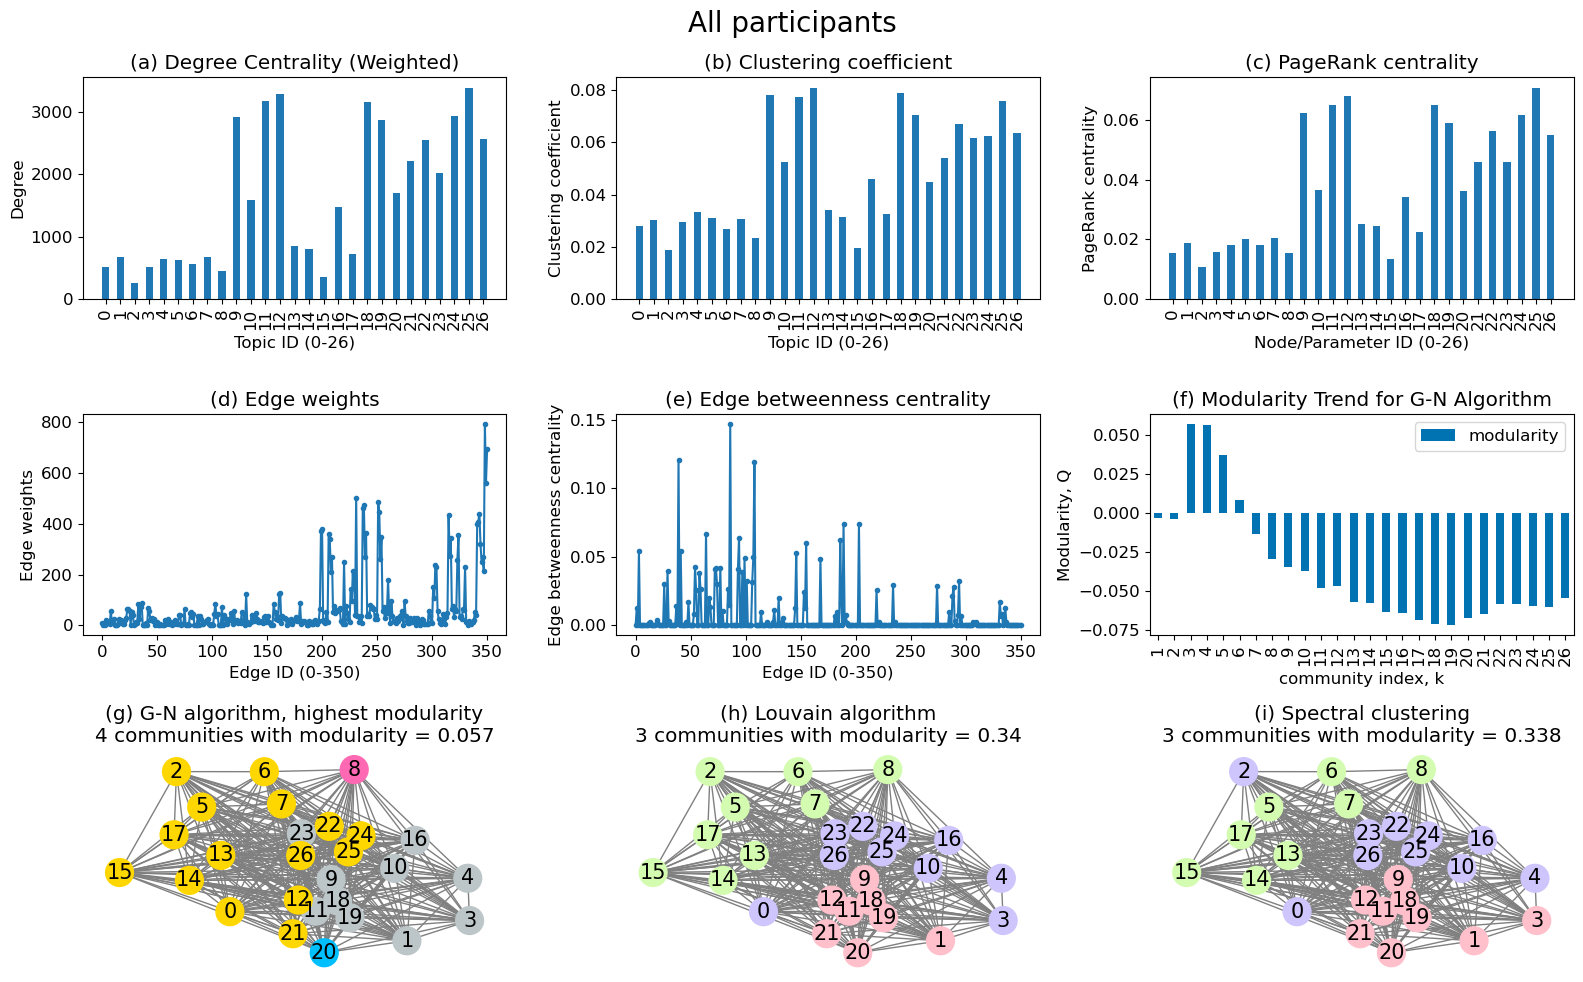

Number of communities = 4 ({0, 23}, {1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21, 24, 25, 26}, {17, 2, 15}, {22})
Number of communities = 3 [[1, 9, 11, 12, 18, 19, 20, 21], [2, 5, 6, 7, 8, 13, 14, 15, 17], [0, 3, 4, 10, 16, 22, 23, 24, 25, 26]]
Number of communities = 3 [[0, 3, 4, 10, 16, 22, 23, 24, 25, 26], [1, 9, 11, 12, 18, 19, 20, 21], [2, 5, 6, 7, 8, 13, 14, 15, 17]]


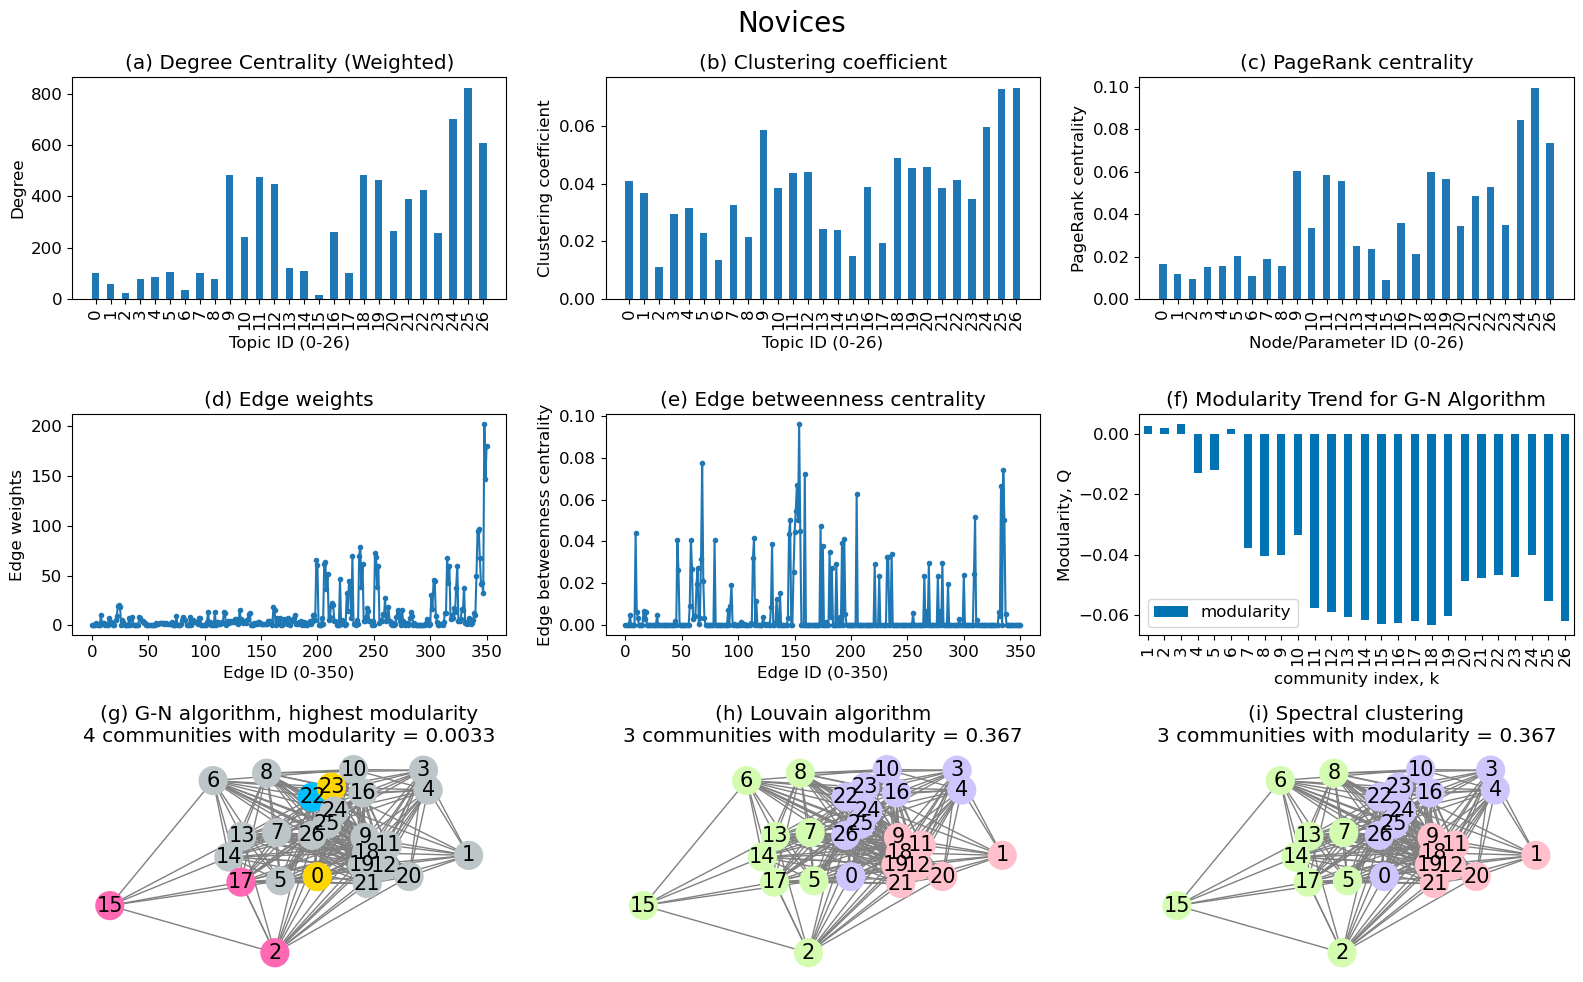

Number of communities = 4 ({0, 1, 3, 4, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26}, {2}, {5, 6, 7, 14, 15, 23}, {8})
Number of communities = 3 [[0, 10, 16, 22, 23, 24, 25, 26], [2, 5, 6, 7, 8, 13, 14, 15, 17], [1, 3, 4, 9, 11, 12, 18, 19, 20, 21]]
Number of communities = 3 [[0, 10, 16, 22, 23, 24, 25, 26], [1, 2, 3, 4, 9, 11, 12, 18, 19, 20, 21], [5, 6, 7, 8, 13, 14, 15, 17]]


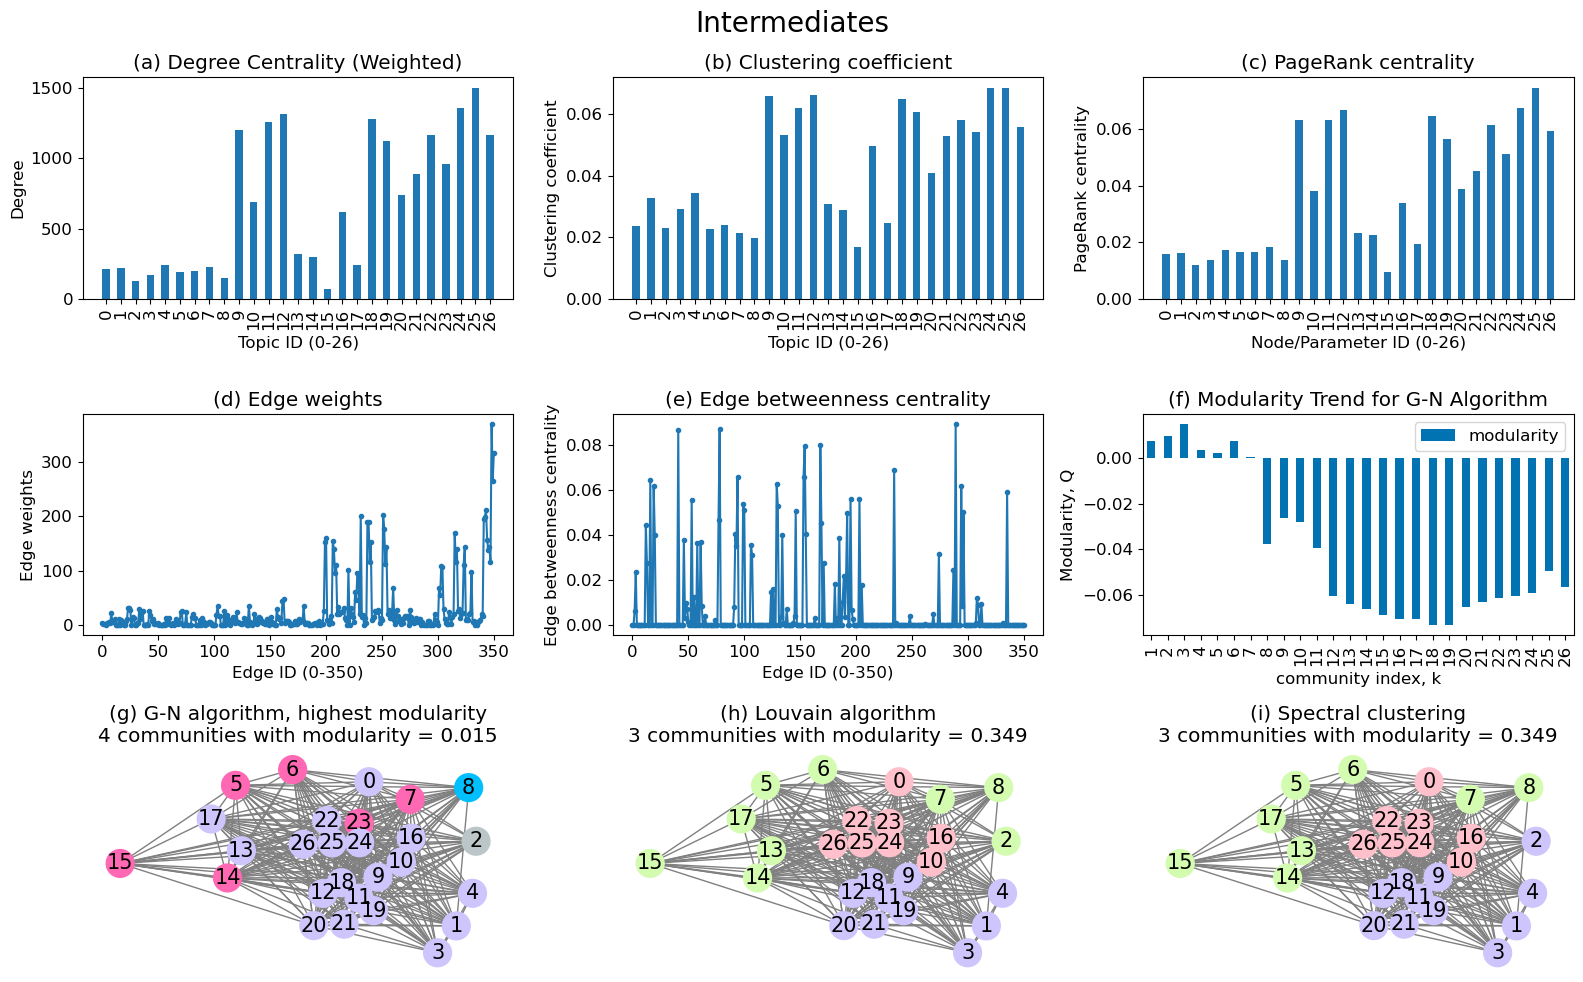

Number of communities = 2 ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26}, {20, 21})
Number of communities = 3 [[1, 9, 11, 12, 18, 19, 20, 21], [3, 4, 10, 16, 22, 23, 24, 25, 26], [0, 2, 5, 6, 7, 8, 13, 14, 15, 17]]
Number of communities = 3 [[0, 1, 3, 7, 9, 11, 12, 18, 19, 20, 21], [2, 5, 6, 8, 13, 14, 15, 17], [4, 10, 16, 22, 23, 24, 25, 26]]


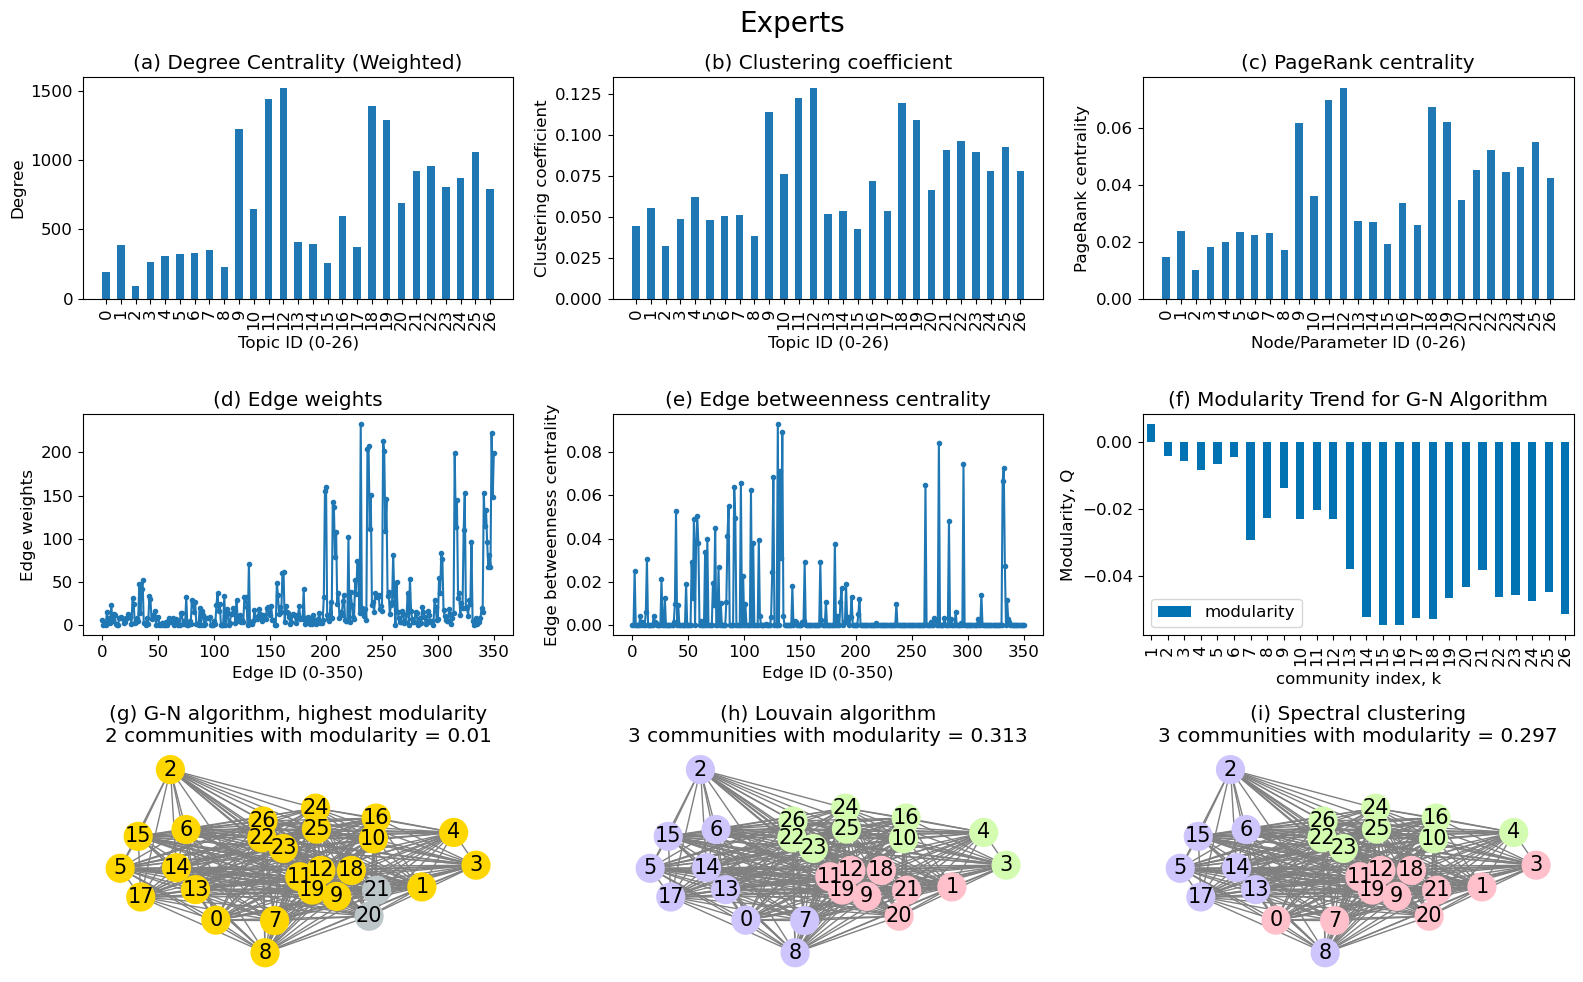

In [12]:
# Please change the parameters HERE to play with different values.
min_word_required = 10
cosine_similarity_to_specify = 0.30
tdf_10, G_list_10, A_list_10 = do_complete_network_analysis(sdf, set_min_number_of_words_required = min_word_required, set_critical_similarity = cosine_similarity_to_specify, to_plot = 1)

### 1. Changes with expertise in the WHOLE NETWORK and the CLUSTERS or COMMUNITIES in them 

Number of communities = 3 [[0, 3, 4, 10, 16, 22, 23, 24, 25, 26], [1, 9, 11, 12, 18, 19, 20, 21], [2, 5, 6, 7, 8, 13, 14, 15, 17]]
Number of communities = 3 [[0, 10, 16, 22, 23, 24, 25, 26], [1, 3, 4, 9, 11, 12, 18, 19, 20, 21], [2, 5, 6, 7, 8, 13, 14, 15, 17]]
Number of communities = 3 [[0, 2, 5, 6, 7, 8, 13, 14, 15, 17], [1, 9, 11, 12, 18, 19, 20, 21], [3, 4, 10, 16, 22, 23, 24, 25, 26]]


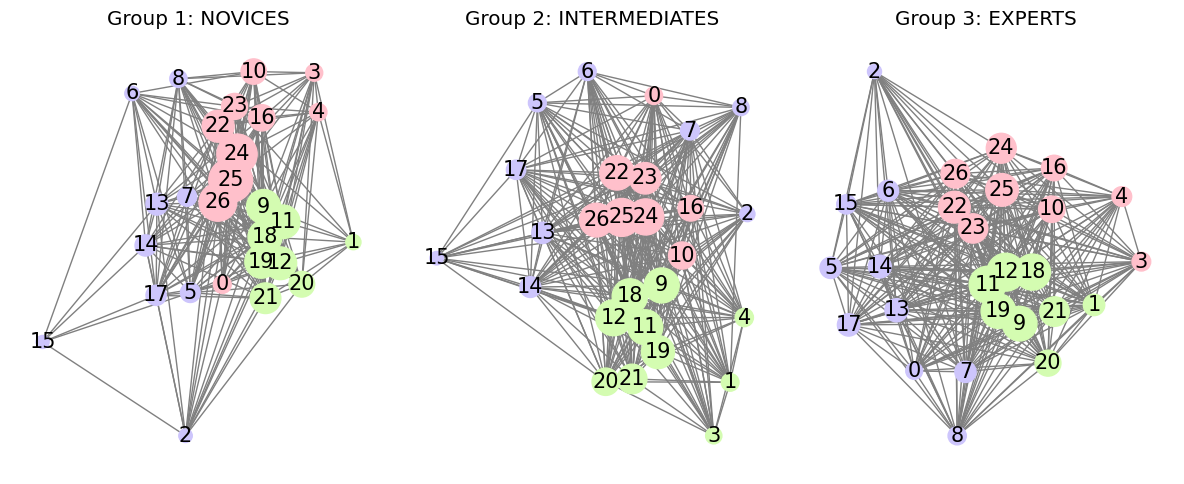

In [13]:
%matplotlib inline

G_list = G_list_10
A_list = A_list_10

# Detect the communities in the four graphs.
communities_louvain_all_groups_as_list = []
for i_group in range(4):
    G_x = G_list[i_group]
    adj_matrix_x = A_list[i_group]
    # communities_louvain = nx.community.louvain_communities(G_x, weight = "weight")
    # communities_louvain = [list(comm) for comm in communities_louvain]
    communities_louvain = community_detection_by_louvain_algorithm(G_x, set_seed = 5)
    communities_louvain_all_groups_as_list.append(communities_louvain)

## Match colors of similar communities across figures
reference_group_id = 0
node_colors_all_groups_as_list = \
        [create_matching_community_node_colors_for_two_partitions(G_x,
        communities_louvain_all_groups_as_list[reference_group_id],
        communities_louvain_all_groups_as_list[i_group])[1] for i_group in range(4)]

fig = plt.figure(figsize = (12, 5)) # , sharex = True, sharey = True, figsize = (12, 8), projection = "3d")
ax = [fig.add_subplot(131 + i) for i in range(3)] #, projection = "3d")

# fig, axs = plt.subplots(2,2, sharex = True, sharey = True, figsize = (12, 8), projection = "3d")
# ax  = axs.flatten()

group_name_list = [r"Group 1: NOVICES", r"Group 2: INTERMEDIATES", r"Group 3: EXPERTS"]


# Plot the graphs
for i_group in range(1,4):
    G_x = G_list[i_group]
    adj_matrix_x = A_list[i_group]
    communities_louvain = communities_louvain_all_groups_as_list[i_group]
    ax_x = ax[i_group - 1]

    # PageRank as node size
    node_scale = 10000
    node_sizes_by_pagerank = node_scale*np.array(list(nx.pagerank(G_x, weight = "weight").values()))
    
    visualize_communities_RR(G_x, communities_louvain, ax = ax_x, \
                             node_colors_by_community = node_colors_all_groups_as_list[i_group], \
                             node_size = node_sizes_by_pagerank, to_set_title = 0)
    modularity_of_comm_detection = round(nx.community.modularity(G_x, communities_louvain), len(communities_louvain))
    ax_x.set_title(group_name_list[i_group-1])

# plt.suptitle("Communities from the Louvain Algorithm", fontsize = 20)
plt.tight_layout()
plt.savefig("Figs/Three_groups_communities_louvain.png", dpi = 600)
plt.show()
plt.close()

## 2. Changes with expertise in the HIERARCHIES within the network

Here we use hierarchical clustering to look at the hierarchical organization of the networks. The results are plotted below as dendrograms based on the networks.

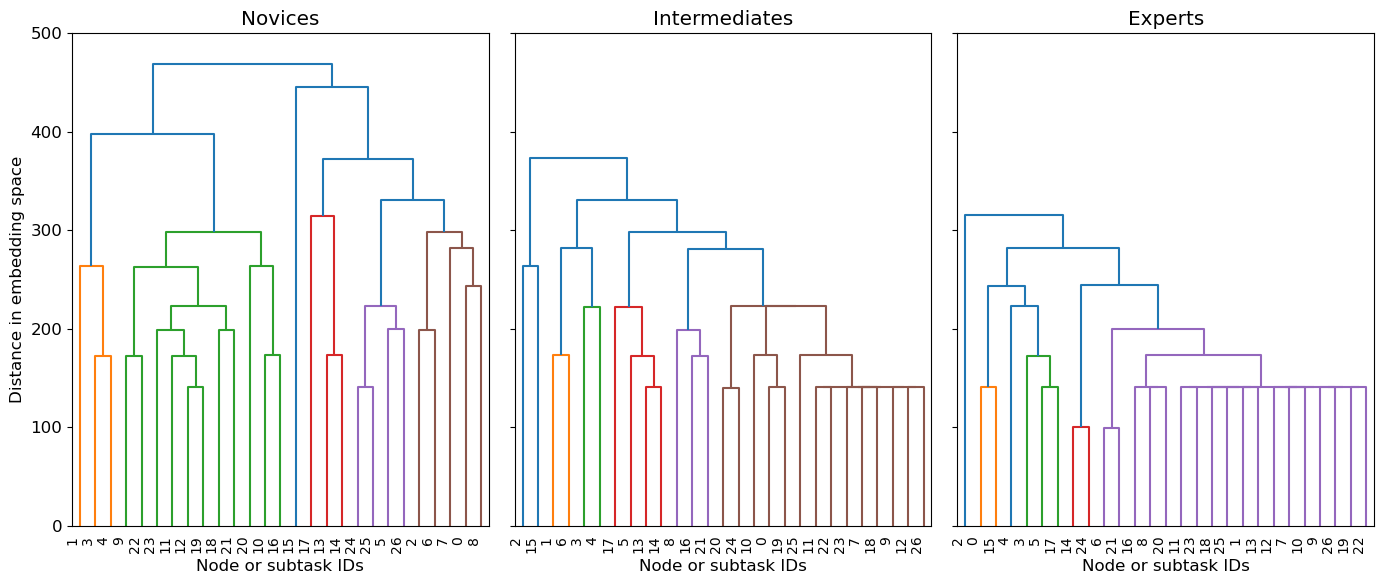

In [14]:
group_names_list = ["Novices", "Intermediates", "Experts"]
fig, ax = plt.subplots(1,3, figsize = (14, 6), sharey = True)

for i_group in range(1,4):
    adj_matrix_x = A_list[i_group]# np.c_[node_pairs, weights]
    distance_matrix_x = 1/(adj_matrix_x + 0.01)
    linkage_matrix_x = linkage(distance_matrix_x, method = "complete")

    ax_x = ax[i_group - 1]
    dendrogram(linkage_matrix_x, ax = ax_x)
    ax_x.set_xticks(ax_x.get_xticks(), ax_x.get_xticklabels(), rotation=90, ha='right')
    ax_x.set_ylim([0., 500.])
    ax_x.set_title(group_names_list[i_group-1])
    # for y_value in [100, 200, 300]: ax_x.axhline(y = y_value, ls = "--")
    ax_x.set_xlabel("Node or subtask IDs")
ax[0].set_ylabel("Distance in embedding space")

# plt.suptitle("Hiearchical Clustering using Dendrogram")
# ax[1].xlabel ("Node or subtask IDs")
plt.tight_layout()
plt.savefig("Figs/Three_groups_hierarchical_structure.png", dpi = 600)
plt.show()
plt.close()

<!-- SEVERAL MAIN DISCUSSION POINTS:

Louvain Community Detection based on Modularity optimization:
    All clusters are very similar. AMI and ARI = ?
    
    Expert networks are better separated than the network for the novices.

Hieara


1. Height

?? A threshold for the distance between groups and elements. When the distance between (1) an element and (2) another element or a group is below the threshold value, they are grouped together. -->

## 3. Changes with expertise in the EDGE WEIGHT distributions

1.0
1.0
1.0
1.0
Edge W values, in vs out community 0.7883986928104575 0.21160130718954248
Edge W Ratio, in vs out community 3.7258687258687258
Edge W values, in vs out community 0.7638006022080965 0.23619939779190363
Edge W Ratio, in vs out community 3.233711048158641
Edge W values, in vs out community 0.6991834032222467 0.3008165967777533
Edge W Ratio, in vs out community 2.324284666177549


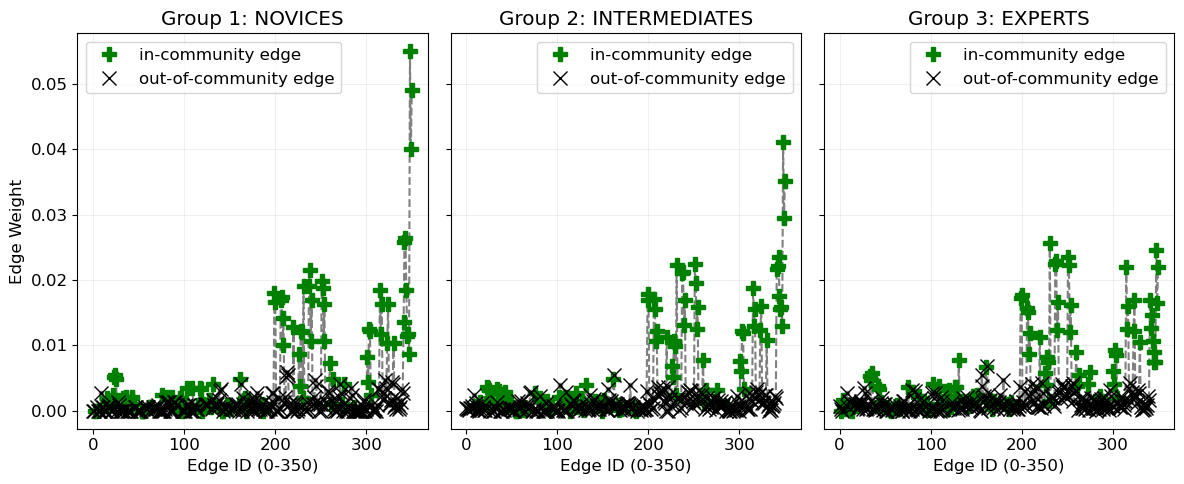

In [15]:
G_list = G_list_10
A_list = A_list_10

edge_attributes_all_groups_as_list = []

for i_group in range(4):
    G_x = G_list[i_group]
    adj_matrix_x = A_list[i_group]

    edge_attributes = nx.get_edge_attributes(G_x, name = "weight")
    num_nodes = len(G_x.nodes)
    sorted_key_list = list(itertools.combinations(np.arange(num_nodes), r = 2))
    edge_attributes_fixed = {key: edge_attributes.get(key, 0) for key in sorted_key_list}
    sum_edge_attributes = np.sum(list(edge_attributes_fixed.values()))

    # A simple check to see if all mapped correctly
    if (sum(edge_attributes.values()) != sum(edge_attributes_fixed.values())):
        print("Problem with Edge weights")

    # convert weights to probabilities
    edge_attributes_fixed = {k: v/sum_edge_attributes for k, v in edge_attributes_fixed.items()}
    print(np.sum(list(edge_attributes_fixed.values())))

    edge_attributes_all_groups_as_list.append(edge_attributes_fixed)
   

# fig = plt.figure(figsize = (12, 5)) # , sharex = True, sharey = True, figsize = (12, 8), projection = "3d")
# # ax = [fig.add_subplot(131 + i) for i in range(3)] #, projection = "3d")
# ax = [0]*3
# ax[0] = fig.add_subplot(131); ax[1] = fig.add_subplot(132, sharey = ax[0]); ax[2] = fig.add_subplot(133, sharey = ax[0])


fig, axs = plt.subplots(1,3, sharey = True, figsize = (12, 5)) #, projection = "3d")
ax  = axs.flatten()

group_name_list = [r"Group 1: NOVICES", r"Group 2: INTERMEDIATES", r"Group 3: EXPERTS"]




for i_group in range(1,4):
    edge_attributes_fixed = edge_attributes_all_groups_as_list[i_group]
    communities_louvain = communities_louvain_all_groups_as_list[i_group]
    community_labels_for_nodes = return_community_labels_from_community_set(communities_louvain)
    ax_x = ax[i_group - 1]

    # create a temporary df with the edge attributes
    x = np.c_[list(edge_attributes_fixed.keys()), list(edge_attributes_fixed.values())]
    xdf = pd.DataFrame(x, columns =  ["n1", "n2", "edge_attributes"])

    xdf["n1"] = xdf.n1.astype(int)
    xdf["n2"] = xdf.n2.astype(int)

    n1_comms = xdf.n1.apply(lambda x: community_labels_for_nodes[x])
    n2_comms = xdf.n2.apply(lambda x: community_labels_for_nodes[x])

    xdf["is_in_community"] = (n1_comms == n2_comms)

    # xdf.loc[~xdf.is_in_community]
    ax_x.plot(xdf.index, xdf.edge_attributes, ls = "--", marker = ".", color = "grey")
    ax_x.plot(xdf.loc[xdf.is_in_community].index, xdf.loc[xdf.is_in_community].edge_attributes, ls = "", marker = "P", color = "green", ms = 10, label = "in-community edge")
    ax_x.plot(xdf.loc[~xdf.is_in_community].index, xdf.loc[~xdf.is_in_community].edge_attributes, ls = "", marker = "x", color = "black", ms = 10, label = "out-of-community edge")
    ax_x.grid(alpha = 0.5)
    # ax_x.set_ylim([0, 1.1])
    ax_x.legend()
    ax_x.set_xlabel("Edge ID (0-350)")
    if i_group == 1: ax_x.set_ylabel("Edge Weight")
    ax_x.grid(True, alpha = 0.2)
    ax_x.set_title(group_name_list[i_group-1])
    # print(np.max(xdf.edge_attributes))
    print("Edge W values, in vs out community", xdf.loc[xdf.is_in_community].edge_attributes.sum(), xdf.loc[~xdf.is_in_community].edge_attributes.sum())
    print("Edge W Ratio, in vs out community", xdf.loc[xdf.is_in_community].edge_attributes.sum()/xdf.loc[~xdf.is_in_community].edge_attributes.sum())


# plt.suptitle("Edge Weight Distributions", fontsize = 20)
plt.tight_layout()
plt.savefig("Figs/three_groups_Edge_weights.png", dpi = 300)
plt.show()
plt.close()


In [16]:
# edge_attributes_all_groups_as_list[3]
np.sum(detailed_tuning_text.all_text_in_words.apply(len))

3387

## 4. Changes with expertise in the PAGERANK distributions

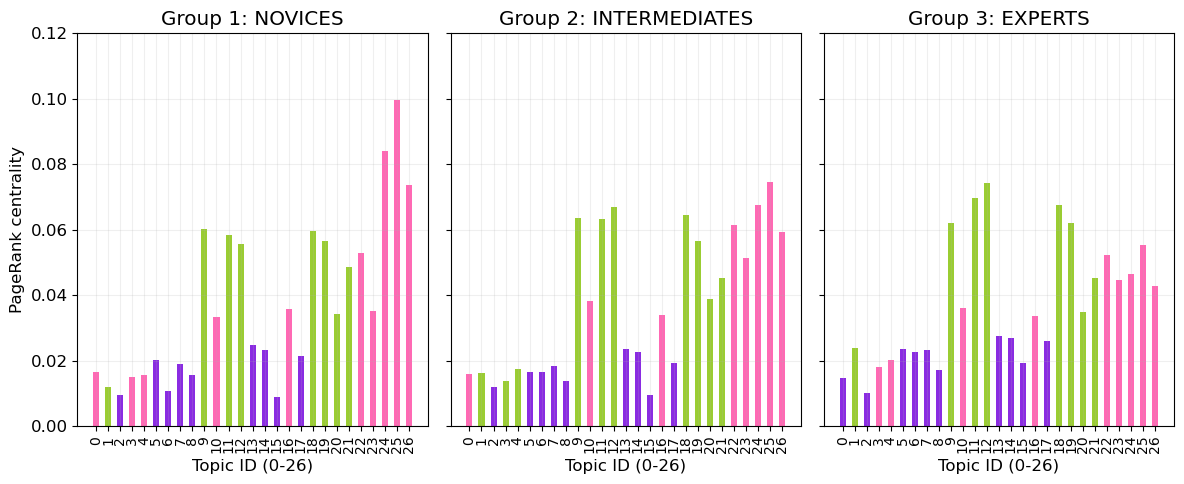

In [17]:
## Make colors a bit brighter for PageRank
all_colors = ["#D4FCB1", "#CDC5FC", "pink", "gold", "#BCC6C8", "hotpink", "deepskyblue", "cyan", "olive", "orchid"]
all_colors_for_pagerank = ['yellowgreen', 'blueviolet', 'hotpink', "gold", "darkgrey", "hotpink", "deepskyblue", "cyan", "olive", "orchid"]
modify_colors_for_pagerank = {c1:c2 for c1, c2 in zip(all_colors, all_colors_for_pagerank)}

fig, axs = plt.subplots(1,3, sharey = True, figsize = (12, 5)) #, projection = "3d")
ax  = axs.flatten()

group_name_list = [r"Group 1: NOVICES", r"Group 2: INTERMEDIATES", r"Group 3: EXPERTS"]


bar_width = 0.5
# ## Match colors of similar communities across figures
# reference_group_id = 0
# node_colors_all_groups_as_list = \
#         [create_matching_community_node_colors_for_two_partitions(G_x,
#         communities_louvain_all_groups_as_list[reference_group_id],
#         communities_louvain_all_groups_as_list[i_group])[1] for i_group in range(4)]
for i_group in range(1, 4):
    G_x = G_list[i_group]
    ax_x = ax[i_group - 1]

    color_list = node_colors_all_groups_as_list[i_group]
    modified_color_list_for_pagerank = [modify_colors_for_pagerank[color_1] for color_1 in color_list]
    to_plot = nx.pagerank(G_x, weight = "weight")
    labels, values = zip(*dict(to_plot).items())
    indices = labels
    ax_x.bar(indices, values, bar_width, color = modified_color_list_for_pagerank)
    ax_x.set_xticks(indices, labels, rotation = 90, fontsize = 10)
    ax_x.set_xlabel("Topic ID (0-26)")
    if i_group == 1: ax_x.set_ylabel("PageRank centrality")
    ax_x.grid(True, alpha = 0.2)
    ax_x.set_ylim([0, 0.12])
    ax_x.set_title(group_name_list[i_group-1])
# plt.suptitle("PageRank distributions of over parameters (color coded by community)", fontsize = 20)
plt.tight_layout()
plt.savefig("Figs/three_groups_PageRanks.png", dpi = 300)
plt.show()
plt.close()

## Changes at the DIFFERENT NETWORK LEVELS with YEARS of experience

In [18]:
# max_years_of_exp = 8
# num_points_per_year = 2

# for years_of_exp, i_years_of_exp in zip(np.arange(1/num_points_per_year, max_years_of_exp + 1/num_points_per_year, 1/num_points_per_year), np.arange(max_years_of_exp*num_points_per_year)):
#     print(years_of_exp, i_years_of_exp, years_of_exp-(years_of_exp - 1/num_points_per_year))

## Number of participants in each level of experience

0 --- 0.5 --- 207 --- 42
1 --- 1.0 --- 169 --- 37
2 --- 1.5 --- 163 --- 40
3 --- 2.0 --- 152 --- 32
4 --- 2.5 --- 123 --- 24
5 --- 3.0 --- 160 --- 19
6 --- 3.5 --- 147 --- 21
7 --- 4.0 --- 108 --- 18
8 --- 4.5 --- 131 --- 17
9 --- 5.0 --- 95 --- 16
10 --- 5.5 --- 89 --- 13
11 --- 6.0 --- 68 --- 12
12 --- 6.5 --- 95 --- 11
13 --- 7.0 --- 56 --- 11
14 --- 7.5 --- 51 --- 8
15 --- 8.0 --- 25 --- 6
16 --- 8.5 --- 27 --- 4
17 --- 9.0 --- 21 --- 4
18 --- 9.5 --- 18 --- 4
19 --- 10.0 --- 18 --- 3
20 --- 10.5 --- 103 --- 4
[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10.  10.5]


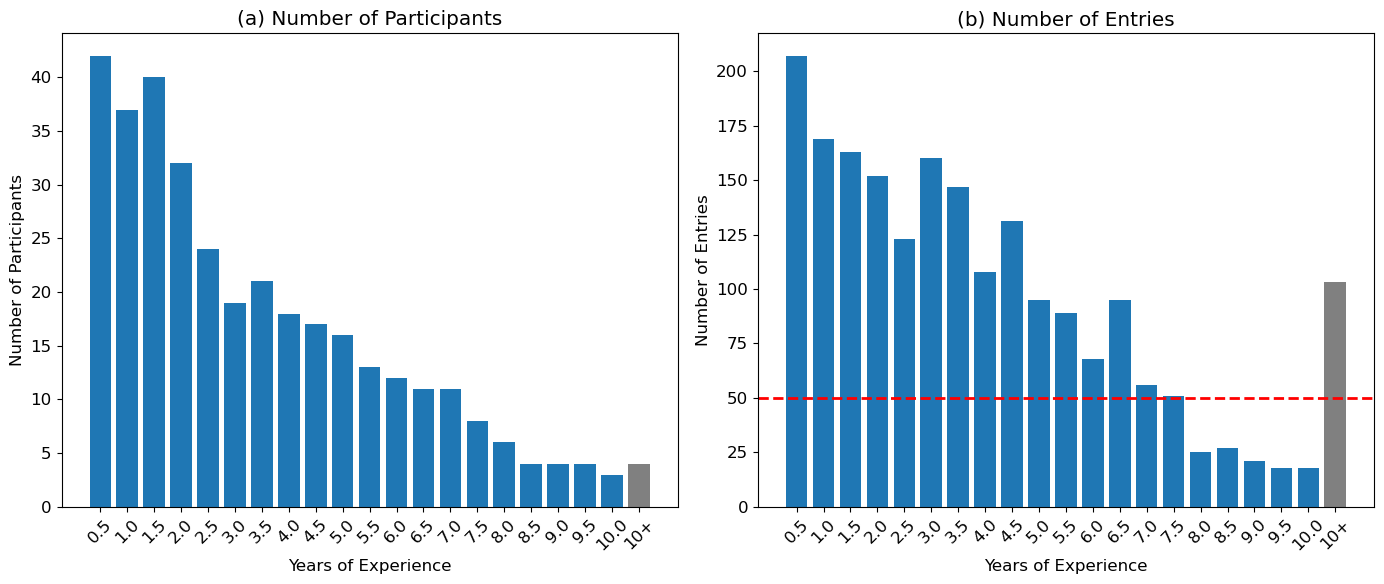

In [19]:
# gx_df_test = tdf[(tdf.p_exp > 7*365)]
# print(i_period, "---", years_of_exp, "---", gx_df_test.shape[0], "---", gx_df_test.pid.unique().shape[0], "\n\n")

tdf = tdf_10
max_years_of_exp = 10
num_points_per_year = 2


num_unique_pids = np.zeros([max_years_of_exp*num_points_per_year+1])
num_elog_entries = np.zeros([max_years_of_exp*num_points_per_year+1])

for years_of_exp, i_period in zip(np.arange(1/num_points_per_year, max_years_of_exp + 2/num_points_per_year, 1/num_points_per_year), np.arange(max_years_of_exp*num_points_per_year+1)):
    # group x df
    if (i_period == max_years_of_exp*num_points_per_year):
        gx_df_test = tdf[(tdf.p_exp >= (years_of_exp - 1/num_points_per_year)*365)]
    else:    
        gx_df_test = tdf[(tdf.p_exp >= (years_of_exp - 1/num_points_per_year)*365) & (tdf.p_exp < years_of_exp*365)]

    num_unique_pids[i_period] = gx_df_test.pid.unique().shape[0]
    num_elog_entries[i_period] = gx_df_test.shape[0] 
    print(i_period, "---", years_of_exp, "---", gx_df_test.shape[0], "---", gx_df_test.pid.unique().shape[0])


## ---------- Barplots ---------------
# plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(1,2, figsize = (14, 6))
ax  = axs.flatten()
# bar_width = 0.4
indices = np.arange(1/num_points_per_year, max_years_of_exp + 2/num_points_per_year, 1/num_points_per_year)
modified_indices_for_tick_labels = [str(x) for x in indices]
modified_indices_for_tick_labels[-1] = "%i+"%max_years_of_exp
color_list_for_indices = ["tab:blue" for x in indices]
color_list_for_indices[-1] = "grey"
bar_width_list = [0.4 for x in indices]
# bar_width_list[-1] = 0.6
hatch_list = ["" for x in indices]
# hatch_list[-1] = "/"
print(indices)

# group_name_list = [r"Group 1: NOVICES", r"Group 2: INTERMEDIATES", r"Group 3: EXPERTS"]
ax_x = ax[0]
ax_x.bar(indices, num_unique_pids, width = bar_width_list, color = color_list_for_indices, hatch = hatch_list)
ax_x.set_xticks(indices, modified_indices_for_tick_labels, rotation = 45)
ax_x.set_xlabel("Years of Experience")
ax_x.set_ylabel("Number of Participants")
ax_x.set_title("(a) Number of Participants")
# ax_x.grid(True)


ax_x = ax[1]
ax_x.bar(indices, num_elog_entries, width = bar_width_list, color = color_list_for_indices, hatch = hatch_list)
ax_x.axhline(y = 50, ls = "--", color = "red", lw = 2)
ax_x.set_xticks(indices, modified_indices_for_tick_labels, rotation = 45)
ax_x.set_xlabel("Years of Experience")
ax_x.set_ylabel("Number of Entries")
ax_x.set_title("(b) Number of Entries")
# ax_x.grid(True)

# ## Match colors of similar communities across figures
# reference_group_id = 0
# node_colors_all_groups_as_list = \
#         [create_matching_community_node_colors_for_two_partitions(G_x,
#         communities_louvain_all_groups_as_list[reference_group_id],
#         communities_louvain_all_groups_as_list[i_group])[1] for i_group in range(4)]
# for i_group in range(1, 4):
#     G_x = G_list[i_group]
#     ax_x = ax[i_group - 1]

#     color_list = node_colors_all_groups_as_list[i_group]
#     modified_color_list_for_pagerank = [modify_colors_for_pagerank[color_1] for color_1 in color_list]
#     to_plot = nx.pagerank(G_x, weight = "weight")
#     labels, values = zip(*dict(to_plot).items())
#     indices = labels
#     ax_x.bar(indices, values, bar_width, color = modified_color_list_for_pagerank)
#     ax_x.set_xticks(indices, labels, rotation = 90)
#     ax_x.set_xlabel("Topic ID (0-26)")
#     if i_group == 1: ax_x.set_ylabel("PageRank centrality")
#     ax_x.grid(True, alpha = 0.2)
#     ax_x.set_ylim([0, 0.12])
#     ax_x.set_title(group_name_list[i_group-1])
# plt.suptitle("PageRank distributions of over parameters (color coded by community)", fontsize = 20)
plt.tight_layout()
plt.savefig("Figs/Participants_barplots.png", dpi = 300)
plt.show()
plt.close()


## Half-year increments

#### All changes by DISTANCE (lower lim = 0, upper lim = $\infty$)

i_period --- Year --- Number of elogs --- Number of unique authors
0 --- 0.5 --- 207 --- 42
1 --- 1.0 --- 169 --- 37
2 --- 1.5 --- 163 --- 40
3 --- 2.0 --- 152 --- 32
4 --- 2.5 --- 123 --- 24
5 --- 3.0 --- 160 --- 19
6 --- 3.5 --- 147 --- 21
7 --- 4.0 --- 108 --- 18
8 --- 4.5 --- 131 --- 17
9 --- 5.0 --- 95 --- 16
10 --- 5.5 --- 89 --- 13
11 --- 6.0 --- 68 --- 12
12 --- 6.5 --- 95 --- 11
13 --- 7.0 --- 56 --- 11


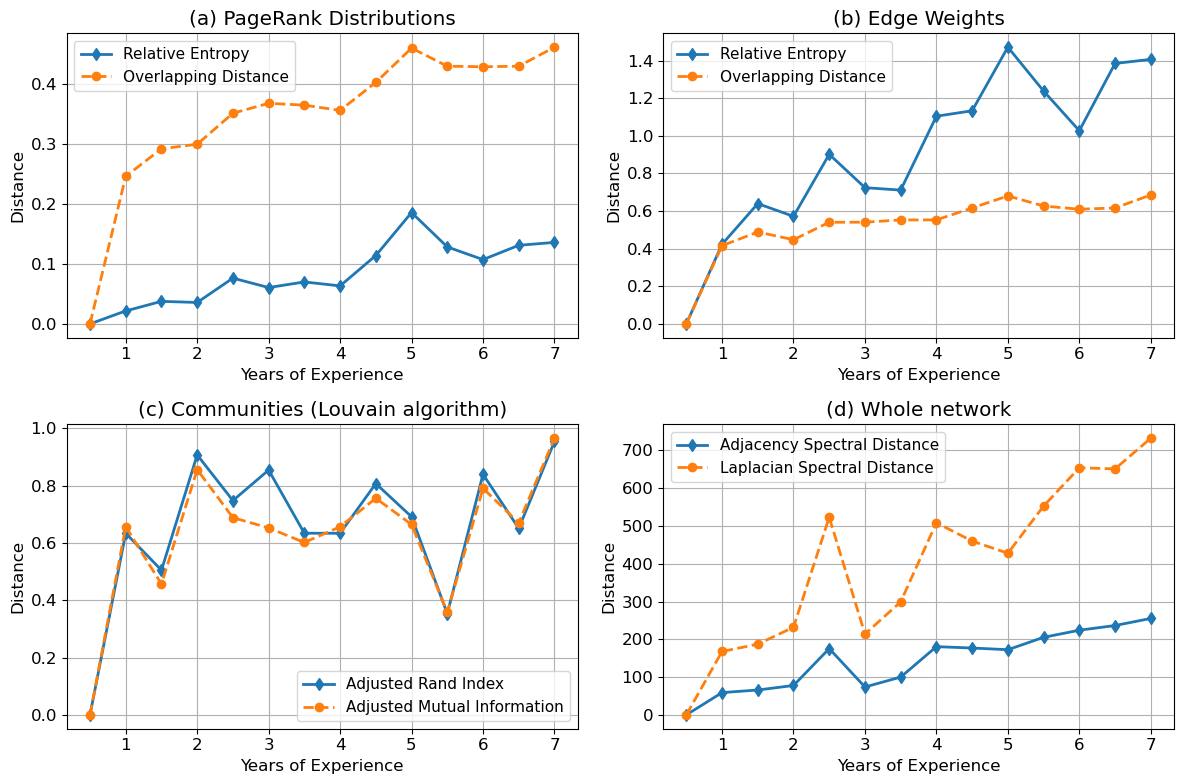

In [20]:
"""
(1) PageRank
(2) Edges a) Weights and b) betweenness
(3) Communities, Louvain
(4) Whole networks

"""

tdf = tdf_10
max_years_of_exp = 7
num_points_per_year = 2


# ---------------- Initializations -------------------
pagerank_dist_list = [0] * (max_years_of_exp * num_points_per_year)
edge_weights_dist_list = [0] * (max_years_of_exp * num_points_per_year)
edge_bet_dist_list = [0] * (max_years_of_exp * num_points_per_year)
communities_dist_list = [0] * (max_years_of_exp * num_points_per_year)
G_list = [0] * (max_years_of_exp * num_points_per_year) # For graph distances
A_list = [0] * (max_years_of_exp * num_points_per_year) # For graph distances
## We measure the similarities across years in several ways

# Bhattacharyya coeff, RE-based similarity, Overlapping index by Pastore et al
    # (and my twist on the OI. Actually very similar)
del_pagerank_bc = np.zeros([(max_years_of_exp * num_points_per_year), 1])
del_pagerank_re = np.zeros([(max_years_of_exp * num_points_per_year), 1])
del_pagerank_oi = np.zeros([(max_years_of_exp * num_points_per_year), 1])
del_pagerank_dsRR = np.zeros([(max_years_of_exp * num_points_per_year), 1])

del_edge_weights_bc = np.zeros([(max_years_of_exp * num_points_per_year), 1])
del_edge_weights_re = np.zeros([(max_years_of_exp * num_points_per_year), 1])
del_edge_weights_oi = np.zeros([(max_years_of_exp * num_points_per_year), 1])
del_edge_weights_dsRR = np.zeros([(max_years_of_exp * num_points_per_year), 1])

del_edge_bet_bc = np.zeros([(max_years_of_exp * num_points_per_year), 1])
del_edge_bet_re = np.zeros([(max_years_of_exp * num_points_per_year), 1])
del_edge_bet_oi = np.zeros([(max_years_of_exp * num_points_per_year), 1])
del_edge_bet_dsRR = np.zeros([(max_years_of_exp * num_points_per_year), 1])


del_communities_ari = np.zeros([(max_years_of_exp * num_points_per_year), 1]) # Adjusted Rand Index and/or Adj mutual information
del_communities_ami = np.zeros([(max_years_of_exp * num_points_per_year), 1]) # Adjusted Rand Index and/or Adj mutual information

del_whole_networks_adjacency = np.zeros([(max_years_of_exp * num_points_per_year), 1]) # adjacency spectal distance -- based on the differences between the spectrum of Graph adjacency matrix
del_whole_networks_laplacian = np.zeros([(max_years_of_exp * num_points_per_year), 1]) # laplacian spectal distance
del_whole_networks_normalized_laplacian = np.zeros([(max_years_of_exp * num_points_per_year), 1]) # laplacian spectal distance


# ------------ Get all networks ---------------------
print("i_period --- Year --- Number of elogs --- Number of unique authors")


# list_years_of_exp = list(np.arange(1/num_points_per_year, max_years_of_exp + 1/num_points_per_year, 1/num_points_per_year))
# list_years_of_exp = list_years_of_exp.append(max_years_of_exp)

for years_of_exp, i_period in zip(np.arange(1/num_points_per_year, max_years_of_exp + 1/num_points_per_year, 1/num_points_per_year), np.arange(max_years_of_exp*num_points_per_year)):
    # group x df
    
    gx_df = tdf[(tdf.p_exp >= (years_of_exp - 1/num_points_per_year)*365) & (tdf.p_exp < years_of_exp*365)]

    print(i_period, "---", years_of_exp, "---", gx_df.shape[0], "---", gx_df.pid.unique().shape[0])

    # Here, we convert the likely_knobs info for each entry into an adjacency matrix
    # basically, we imagine the knobs in one entry as connected nodes in a network.
    # Then, we add the adj matrices together to get the whole network.

    adj_matrix_gx = gx_df.likely_knobs_lsa.apply(lambda x: return_adj_matrix(x)).sum() # Create adj matrix from likely knobs
    # create network
    G_gx = nx.from_numpy_array(adj_matrix_gx) # Adj matrix --> nx network

    # measures of interest
    pagerank_gx = nx.pagerank(G_gx, weight = "weight")

    edge_weights_gx = nx.get_edge_attributes(G_gx, name = "weight")
    num_nodes_gx = len(G_gx.nodes)
    sorted_key_list_gx = list(itertools.combinations(np.arange(num_nodes_gx), r = 2))
    edge_weights_fixed_gx = {key: edge_weights_gx.get(key, 0) for key in sorted_key_list_gx}

    edge_bet_gx = nx.edge_betweenness_centrality(G_gx, weight = "weight")
    num_nodes_gx = len(G_gx.nodes)
    sorted_key_list_gx = list(itertools.combinations(np.arange(num_nodes_gx), r = 2))
    edge_bet_fixed_gx = {key: edge_bet_gx.get(key, 0) for key in sorted_key_list_gx}

    communities_louvain_gx = nx.community.louvain_communities(G_gx, weight = "weight", seed = 2)
    communities_spectral_clustering_gx = community_detection_by_spectral_clustering(G_gx, adj_matrix_gx, num_clusters = 3)

    # We will compare the first three measures as distributions using the Bhattacharyya coefficient
    pagerank_gx_as_probs = np.array(list(pagerank_gx.values()))
    edge_weights_gx_as_probs = np.array(list(edge_weights_fixed_gx.values()))/sum(edge_weights_fixed_gx.values())
    edge_bet_gx_as_probs = np.array(list(edge_bet_fixed_gx.values()))/sum(edge_bet_fixed_gx.values())


    pagerank_dist_list[i_period] = pagerank_gx_as_probs
    edge_weights_dist_list[i_period] = edge_weights_gx_as_probs
    edge_bet_dist_list[i_period] = edge_bet_gx_as_probs
    communities_dist_list[i_period] = communities_louvain_gx # communities_spectral_clustering_gx
    G_list[i_period] = G_gx
    A_list[i_period] = adj_matrix_gx


# ------------ Get all DISTANCES ---------------------
## -------------- Single reference comparisons ----------------

# NOTE: We are using the first period (i.e., the first year or the first half-year, depending on our desire) as the reference.
i_reference_period = 0
for years_of_exp, i_period in zip(np.arange(1/num_points_per_year, max_years_of_exp + 1/num_points_per_year, 1/num_points_per_year), np.arange(max_years_of_exp*num_points_per_year)):
    # print(years_of_exp, i_period)
    # PageRank Distribution
    p_gx = pagerank_dist_list[i_period]
    p_ref = pagerank_dist_list[i_reference_period]
    del_pagerank_bc[i_period] = np.sum(np.sqrt(p_gx * p_ref))
    del_pagerank_re[i_period] = relative_entropy(p_gx, p_ref)
    del_pagerank_oi[i_period] = overlapping_index_pastore_2019(p_gx, p_ref)
    del_pagerank_dsRR[i_period] = distributional_similarity_RR(p_gx, p_ref)

    # Edge weight Distribution
    p_gx = edge_weights_dist_list[i_period]
    p_ref = edge_weights_dist_list[i_reference_period]
    del_edge_weights_bc[i_period] = np.sum(np.sqrt(p_gx * p_ref))
    del_edge_weights_re[i_period] = relative_entropy(p_gx, p_ref)
    del_edge_weights_oi[i_period] = overlapping_index_pastore_2019(p_gx, p_ref)
    del_edge_weights_dsRR[i_period] = distributional_similarity_RR(p_gx, p_ref)

    # Edge Betweenness Distribution
    p_gx = edge_bet_dist_list[i_period]
    p_ref = edge_bet_dist_list[i_reference_period]
    del_edge_bet_bc[i_period] = np.sum(np.sqrt(p_gx * p_ref))
    del_edge_bet_re[i_period] = relative_entropy(p_gx, p_ref)
    del_edge_bet_oi[i_period] = overlapping_index_pastore_2019(p_gx, p_ref)
    del_edge_bet_dsRR[i_period] = distributional_similarity_RR(p_gx, p_ref)

    # Communities
    communities_gx = communities_dist_list[i_period]
    communities_ref = communities_dist_list[i_reference_period]
    community_labels_gx = return_community_labels_from_community_set(communities_gx)
    community_labels_ref = return_community_labels_from_community_set(communities_ref)
    del_communities_ari[i_period] = adjusted_rand_score(community_labels_gx, community_labels_ref) # adjusted_rand_score(community_labels_gx, community_labels_ref)
    del_communities_ami[i_period] = adjusted_mutual_info_score(community_labels_gx, community_labels_ref) # adjusted_rand_score(community_labels_gx, community_labels_ref)

    # Whole networks
    G_gx = G_list[i_period]
    G_ref = G_list[i_reference_period]
    A_gx = A_list[i_period]
    A_ref = A_list[i_reference_period]

    del_whole_networks_adjacency[i_period], del_whole_networks_laplacian[i_period], del_whole_networks_normalized_laplacian[i_period] = \
        three_spectral_distances([G_gx, G_ref], [A_gx, A_ref])


## -------------- Plotting ----------------

fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

x_ticks_for_all = np.arange(1/num_points_per_year, max_years_of_exp + 1/num_points_per_year, 1/num_points_per_year)


# 1. PageRank

# ax1t = ax1.twinx()
# ax1.plot(del_pagerank_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax1.plot(x_ticks_for_all, del_pagerank_re, label = r"Relative Entropy", marker = "d", ls = "-", lw = 2, color = "tab:blue")
ax1.plot(x_ticks_for_all, np.sqrt(-np.log(del_pagerank_oi)), label = "Overlapping Distance", marker = "o", ls = "--", lw = 2, color = "tab:orange")
# ax1.plot(del_pagerank_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-", lw = 2)
ax1.set_xlabel("Years of Experience")
ax1.set_ylabel("Distance")
ax1.set_title("(a) PageRank Distributions")
# ax1.set_ylim([0., 1.1])
ax1.legend(fontsize = 11)
ax1.grid(True)

# 2 Edges

# ax2t = ax2.twinx()
# ax2t.plot(del_edge_weights_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
# # ax2.plot(2**((-1)*del_edge_weights_re), label = r"Relative Entropy similarity", marker = "d", ls = "--", lw = 2)
# ax2t.plot(del_edge_weights_oi, label = "Overlapping Index", marker = "o", ls = "--", lw = 2)
# # ax2.plot(del_edge_weights_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# # ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)

# ax2t = ax2.twinx()
# ax2.plot(del_edge_bet_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax2.plot(x_ticks_for_all, del_edge_weights_re, label = r"Relative Entropy", marker = "d", ls = "-", lw = 2, color = "tab:blue")
ax2.plot(x_ticks_for_all, np.sqrt(-np.log(del_edge_weights_oi)), label = "Overlapping Distance", marker = "o", ls = "--", lw = 2, color = "tab:orange")
# ax2.plot(del_edge_bet_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)
ax2.set_xlabel("Years of Experience")
ax2.set_ylabel("Distance")
ax2.set_title("(b) Edge Weights")
# ax2.set_ylim([0., 1.1])
ax2.legend(fontsize = 11)
ax2.grid(True)
# np.sqrt(-np.log(del_communities_ami)
# 3. Communities
ax3.plot(x_ticks_for_all, np.sqrt(-np.log(del_communities_ari)), label = "Adjusted Rand Index", marker = "d", ls = "-", lw = 2)
ax3.plot(x_ticks_for_all, np.sqrt(-np.log(del_communities_ami)), label = "Adjusted Mutual Information", marker = "o", ls = "--", lw = 2)
ax3.set_xlabel("Years of Experience")
ax3.set_ylabel("Distance")
ax3.set_title("(c) Communities (Louvain algorithm)")
# ax3.set_ylim([0., 1.1])
ax3.legend(fontsize = 11)
ax3.grid(True)

# 4. Whole Network
ax4.plot(x_ticks_for_all, del_whole_networks_adjacency, label = "Adjacency Spectral Distance", marker = "d", ls = "-", lw = 2)
ax4.plot(x_ticks_for_all, del_whole_networks_laplacian, label = "Laplacian Spectral Distance", marker = "o", ls = "--", lw = 2)
# ax4.plot(np.exp(-del_whole_networks_normalized_laplacian**2), label = "normalized_laplacian_spectral_distance", marker = "o", ls = "--", lw = 2)
ax4.set_xlabel("Years of Experience")
ax4.set_ylabel("Distance")
ax4.set_title("(d) Whole network")
ax4.legend(fontsize = 11)
ax4.grid(True)

# plt.suptitle("Changes at the Different Levels of the Networks")
plt.tight_layout()
plt.savefig("Figs/%i_points_per_year_DISTANCE_MEASURES_Changes_with_level_of_experience.png"%num_points_per_year, dpi = 300)
plt.show()
plt.close()
# plot_network_measures(G_gx, adj_matrix_gx, title_to_set = "Group x")

#### All changes by SIMILARITY (lower lim = 0, upper lim = 1)

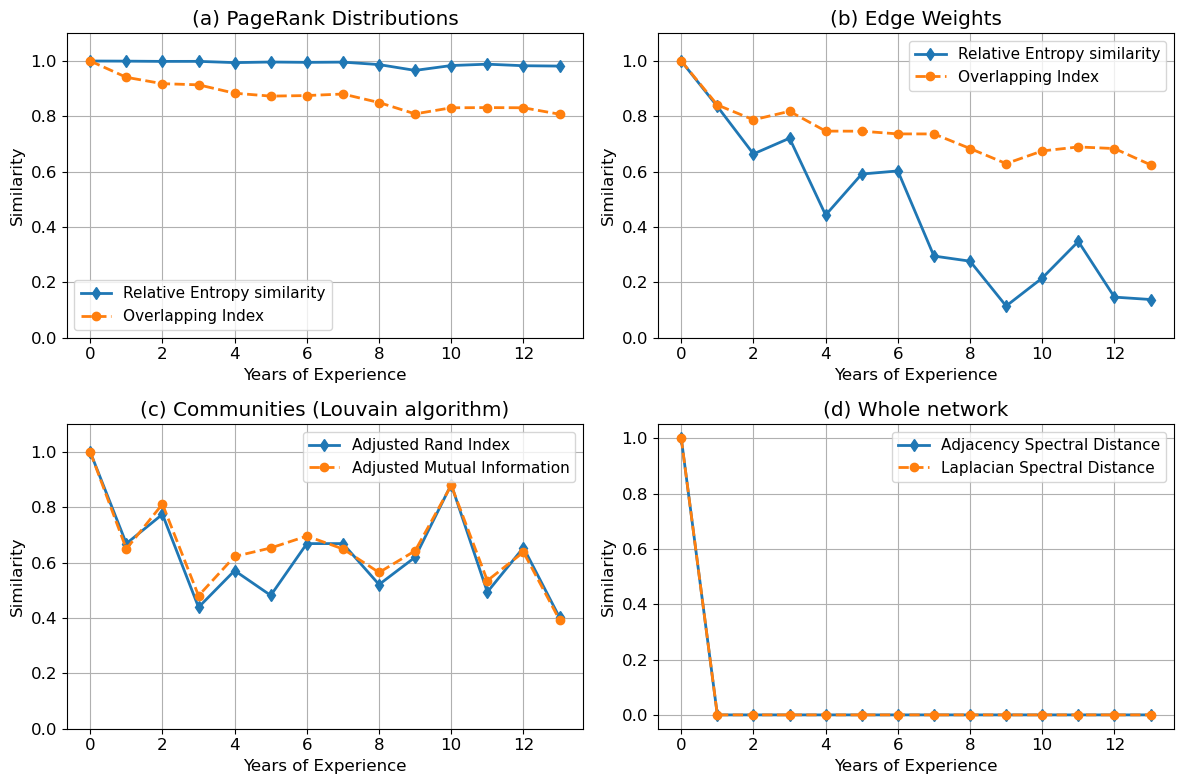

In [21]:


## -------------- Plotting ----------------

fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# 1. PageRank

# ax1.plot(del_pagerank_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax1.plot(np.exp((-1)*del_pagerank_re**2), label = r"Relative Entropy similarity", marker = "d", ls = "-", lw = 2, color = "tab:blue")
ax1.plot(del_pagerank_oi, label = "Overlapping Index", marker = "o", ls = "--", lw = 2, color = "tab:orange")
# ax1.plot(del_pagerank_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-", lw = 2)
ax1.set_xlabel("Years of Experience")
ax1.set_ylabel("Similarity")
ax1.set_title("(a) PageRank Distributions")
ax1.set_ylim([0., 1.1])
ax1.legend(fontsize = 11)
ax1.grid(True)

# 2 Edges

# ax2t = ax2.twinx()
# ax2t.plot(del_edge_weights_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
# # ax2.plot(np.exp((-1)*del_edge_weights_re), label = r"Relative Entropy similarity", marker = "d", ls = "--", lw = 2)
# ax2t.plot(del_edge_weights_oi, label = "Overlapping Index", marker = "o", ls = "--", lw = 2)
# # ax2.plot(del_edge_weights_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# # ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)

# ax2.plot(del_edge_bet_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax2.plot(np.exp((-1)*del_edge_weights_re**2), label = r"Relative Entropy similarity", marker = "d", ls = "-", lw = 2, color = "tab:blue")
ax2.plot(del_edge_weights_oi, label = "Overlapping Index", marker = "o", ls = "--", lw = 2, color = "tab:orange")
# ax2.plot(del_edge_bet_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)
ax2.set_xlabel("Years of Experience")
ax2.set_ylabel("Similarity")
ax2.set_title("(b) Edge Weights")
ax2.set_ylim([0., 1.1])
ax2.legend(fontsize = 11)
ax2.grid(True)

# 3. Communities
ax3.plot(del_communities_ari, label = "Adjusted Rand Index", marker = "d", ls = "-", lw = 2, color = "tab:blue")
ax3.plot(del_communities_ami, label = "Adjusted Mutual Information", marker = "o", ls = "--", lw = 2, color = "tab:orange")
ax3.set_xlabel("Years of Experience")
ax3.set_ylabel("Similarity")
ax3.set_title("(c) Communities (Louvain algorithm)")
ax3.set_ylim([0., 1.1])
ax3.legend(fontsize = 11)
ax3.grid(True)

# 4. Whole Network
ax4.plot(np.exp(-del_whole_networks_adjacency**2), label = "Adjacency Spectral Distance", marker = "d", ls = "-", lw = 2, color = "tab:blue")
ax4.plot(np.exp(-del_whole_networks_laplacian**2), label = "Laplacian Spectral Distance", marker = "o", ls = "--", lw = 2, color = "tab:orange")
# ax4.plot(np.exp(-del_whole_networks_normalized_laplacian**2), label = "normalized_laplacian_spectral_distance", marker = "o", ls = "--", lw = 2)
ax4.set_xlabel("Years of Experience")
ax4.set_ylabel("Similarity")
ax4.set_title("(d) Whole network")
ax4.legend(fontsize = 11)
ax4.grid(True)

# plt.suptitle("Changes at Different Levels of the Networks")
plt.tight_layout()
plt.savefig("Figs/%i_points_per_year_SIMILARITY_MEASURES_Changes_with_level_of_experience.png"%num_points_per_year, dpi = 300)
plt.show()
plt.close()
# plot_network_measures(G_gx, adj_matrix_gx, title_to_set = "Group x")

#### Half-year increments, All participants

NOTE: The last row (year '7.5') contains all entries made by operators with 7.5+ years. To cumbersome to change the table below.
i_period --- Year --- Number of elogs --- Number of unique authors
0 --- 0.5 --- 207 --- 42
1 --- 1.0 --- 169 --- 37
2 --- 1.5 --- 163 --- 40
3 --- 2.0 --- 152 --- 32
4 --- 2.5 --- 123 --- 24
5 --- 3.0 --- 160 --- 19
6 --- 3.5 --- 147 --- 21
7 --- 4.0 --- 108 --- 18
8 --- 4.5 --- 131 --- 17
9 --- 5.0 --- 95 --- 16
10 --- 5.5 --- 89 --- 13
11 --- 6.0 --- 68 --- 12
12 --- 6.5 --- 95 --- 11
13 --- 7.0 --- 56 --- 11
14 --- 7.5 --- 263 --- 12


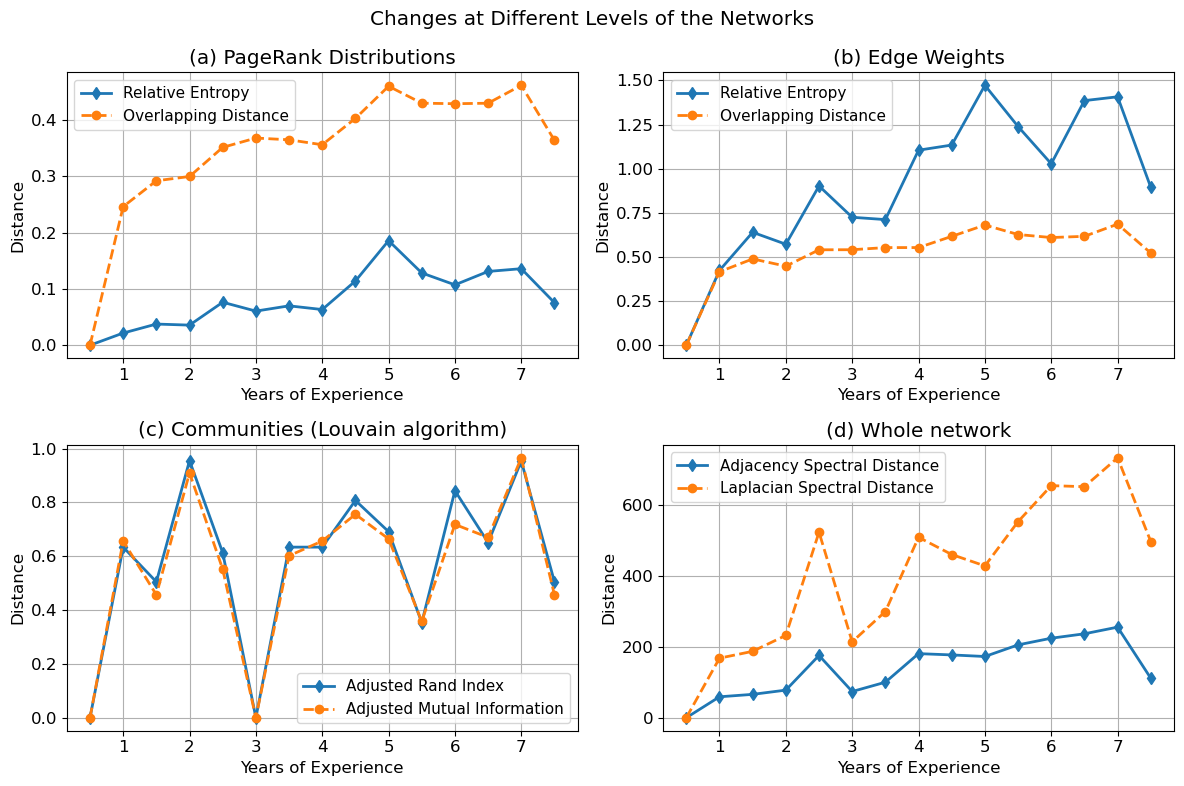

In [27]:
"""
(1) PageRank
(2) Edges a) Weights and b) betweenness
(3) Communities, Louvain
(4) Whole networks

"""

tdf = tdf_10
max_years_of_exp = 7
num_points_per_year = 2


# ---------------- Initializations -------------------
pagerank_dist_list = [0] * (max_years_of_exp * num_points_per_year + 1)
edge_weights_dist_list = [0] * (max_years_of_exp * num_points_per_year + 1)
edge_bet_dist_list = [0] * (max_years_of_exp * num_points_per_year + 1)
communities_dist_list = [0] * (max_years_of_exp * num_points_per_year + 1)
G_list = [0] * (max_years_of_exp * num_points_per_year + 1) # For graph distances
A_list = [0] * (max_years_of_exp * num_points_per_year + 1) # For graph distances
## We measure the similarities across years in several ways

# Bhattacharyya coeff, RE-based similarity, Overlapping index by Pastore et al
    # (and my twist on the OI. Actually very similar)
del_pagerank_bc = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])
del_pagerank_re = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])
del_pagerank_oi = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])
del_pagerank_dsRR = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])

del_edge_weights_bc = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])
del_edge_weights_re = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])
del_edge_weights_oi = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])
del_edge_weights_dsRR = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])

del_edge_bet_bc = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])
del_edge_bet_re = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])
del_edge_bet_oi = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])
del_edge_bet_dsRR = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1])


del_communities_ari = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1]) # Adjusted Rand Index and/or Adj mutual information
del_communities_ami = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1]) # Adjusted Rand Index and/or Adj mutual information

del_whole_networks_adjacency = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1]) # adjacency spectal distance -- based on the differences between the spectrum of Graph adjacency matrix
del_whole_networks_laplacian = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1]) # laplacian spectal distance
del_whole_networks_normalized_laplacian = np.zeros([(max_years_of_exp * num_points_per_year + 1), 1]) # laplacian spectal distance


# ------------ Get all networks ---------------------
print("NOTE: The last row (year '7.5') contains all entries made by operators with 7.5+ years. To cumbersome to change the table below.") 
print("i_period --- Year --- Number of elogs --- Number of unique authors")


# list_years_of_exp = list(np.arange(1/num_points_per_year, max_years_of_exp + 1/num_points_per_year, 1/num_points_per_year))
# list_years_of_exp = list_years_of_exp.append(max_years_of_exp)

for years_of_exp, i_period in zip(np.arange(1/num_points_per_year, max_years_of_exp + 2/num_points_per_year, 1/num_points_per_year), np.arange(max_years_of_exp*num_points_per_year+1)):
    # group x df
    if (i_period == max_years_of_exp*num_points_per_year):
        gx_df = tdf[(tdf.p_exp >= (years_of_exp - 1/num_points_per_year)*365)]
    else:    
        gx_df = tdf[(tdf.p_exp >= (years_of_exp - 1/num_points_per_year)*365) & (tdf.p_exp < years_of_exp*365)]

    print(i_period, "---", years_of_exp, "---", gx_df.shape[0], "---", gx_df.pid.unique().shape[0])

    # Here, we convert the likely_knobs info for each entry into an adjacency matrix
    # basically, we imagine the knobs in one entry as connected nodes in a network.
    # Then, we add the adj matrices together to get the whole network.

    adj_matrix_gx = gx_df.likely_knobs_lsa.apply(lambda x: return_adj_matrix(x)).sum() # Create adj matrix from likely knobs
    # create network
    G_gx = nx.from_numpy_array(adj_matrix_gx) # Adj matrix --> nx network

    # measures of interest
    pagerank_gx = nx.pagerank(G_gx, weight = "weight")

    edge_weights_gx = nx.get_edge_attributes(G_gx, name = "weight")
    num_nodes_gx = len(G_gx.nodes)
    sorted_key_list_gx = list(itertools.combinations(np.arange(num_nodes_gx), r = 2))
    edge_weights_fixed_gx = {key: edge_weights_gx.get(key, 0) for key in sorted_key_list_gx}

    edge_bet_gx = nx.edge_betweenness_centrality(G_gx, weight = "weight")
    num_nodes_gx = len(G_gx.nodes)
    sorted_key_list_gx = list(itertools.combinations(np.arange(num_nodes_gx), r = 2))
    edge_bet_fixed_gx = {key: edge_bet_gx.get(key, 0) for key in sorted_key_list_gx}

    communities_louvain_gx = nx.community.louvain_communities(G_gx, weight = "weight")
    communities_spectral_clustering_gx = community_detection_by_spectral_clustering(G_gx, adj_matrix_gx, num_clusters = 3)

    # We will compare the first three measures as distributions using the Bhattacharyya coefficient
    pagerank_gx_as_probs = np.array(list(pagerank_gx.values()))
    edge_weights_gx_as_probs = np.array(list(edge_weights_fixed_gx.values()))/sum(edge_weights_fixed_gx.values())
    edge_bet_gx_as_probs = np.array(list(edge_bet_fixed_gx.values()))/sum(edge_bet_fixed_gx.values())


    pagerank_dist_list[i_period] = pagerank_gx_as_probs
    edge_weights_dist_list[i_period] = edge_weights_gx_as_probs
    edge_bet_dist_list[i_period] = edge_bet_gx_as_probs
    communities_dist_list[i_period] = communities_louvain_gx # communities_spectral_clustering_gx
    G_list[i_period] = G_gx
    A_list[i_period] = adj_matrix_gx


# ------------ Get all DISTANCES ---------------------
## -------------- Single reference comparisons ----------------

# NOTE: We are using the first period (i.e., the first year or the first half-year, depending on our desire) as the reference.
i_reference_period = 0
for years_of_exp, i_period in zip(np.arange(1/num_points_per_year, max_years_of_exp + 2/num_points_per_year, 1/num_points_per_year), np.arange(max_years_of_exp*num_points_per_year+1)):
    # print(years_of_exp, i_period)
    # PageRank Distribution
    p_gx = pagerank_dist_list[i_period]
    p_ref = pagerank_dist_list[i_reference_period]
    del_pagerank_bc[i_period] = np.sum(np.sqrt(p_gx * p_ref))
    del_pagerank_re[i_period] = relative_entropy(p_gx, p_ref)
    del_pagerank_oi[i_period] = overlapping_index_pastore_2019(p_gx, p_ref)
    del_pagerank_dsRR[i_period] = distributional_similarity_RR(p_gx, p_ref)

    # Edge weight Distribution
    p_gx = edge_weights_dist_list[i_period]
    p_ref = edge_weights_dist_list[i_reference_period]
    del_edge_weights_bc[i_period] = np.sum(np.sqrt(p_gx * p_ref))
    del_edge_weights_re[i_period] = relative_entropy(p_gx, p_ref)
    del_edge_weights_oi[i_period] = overlapping_index_pastore_2019(p_gx, p_ref)
    del_edge_weights_dsRR[i_period] = distributional_similarity_RR(p_gx, p_ref)

    # Edge Betweenness Distribution
    p_gx = edge_bet_dist_list[i_period]
    p_ref = edge_bet_dist_list[i_reference_period]
    del_edge_bet_bc[i_period] = np.sum(np.sqrt(p_gx * p_ref))
    del_edge_bet_re[i_period] = relative_entropy(p_gx, p_ref)
    del_edge_bet_oi[i_period] = overlapping_index_pastore_2019(p_gx, p_ref)
    del_edge_bet_dsRR[i_period] = distributional_similarity_RR(p_gx, p_ref)

    # Communities
    communities_gx = communities_dist_list[i_period]
    communities_ref = communities_dist_list[i_reference_period]
    community_labels_gx = return_community_labels_from_community_set(communities_gx)
    community_labels_ref = return_community_labels_from_community_set(communities_ref)
    del_communities_ari[i_period] = adjusted_rand_score(community_labels_gx, community_labels_ref) # adjusted_rand_score(community_labels_gx, community_labels_ref)
    del_communities_ami[i_period] = adjusted_mutual_info_score(community_labels_gx, community_labels_ref) # adjusted_rand_score(community_labels_gx, community_labels_ref)

    # Whole networks
    G_gx = G_list[i_period]
    G_ref = G_list[i_reference_period]
    A_gx = A_list[i_period]
    A_ref = A_list[i_reference_period]

    del_whole_networks_adjacency[i_period], del_whole_networks_laplacian[i_period], del_whole_networks_normalized_laplacian[i_period] = \
        three_spectral_distances([G_gx, G_ref], [A_gx, A_ref])


## -------------- Plotting ----------------

fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

x_ticks_for_all = np.arange(1/num_points_per_year, max_years_of_exp + 2/num_points_per_year, 1/num_points_per_year)


# 1. PageRank

# ax1.plot(del_pagerank_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax1.plot(x_ticks_for_all, del_pagerank_re, label = r"Relative Entropy", marker = "d", ls = "-", lw = 2)
ax1.plot(x_ticks_for_all, np.sqrt(-np.log(del_pagerank_oi)), label = "Overlapping Distance", marker = "o", ls = "--", lw = 2)
# ax1.plot(del_pagerank_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-", lw = 2)
ax1.set_xlabel("Years of Experience")
ax1.set_ylabel("Distance")
ax1.set_title("(a) PageRank Distributions")
# ax1.set_ylim([0., 1.1])
ax1.legend(fontsize = 11)
ax1.grid(True)

# 2 Edges

# ax2t = ax2.twinx()
# ax2t.plot(del_edge_weights_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
# # ax2.plot(2**((-1)*del_edge_weights_re), label = r"Relative Entropy similarity", marker = "d", ls = "--", lw = 2)
# ax2t.plot(del_edge_weights_oi, label = "Overlapping Index", marker = "o", ls = "--", lw = 2)
# # ax2.plot(del_edge_weights_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# # ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)

# ax2.plot(del_edge_bet_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax2.plot(x_ticks_for_all, del_edge_weights_re, label = r"Relative Entropy", marker = "d", ls = "-", lw = 2)
ax2.plot(x_ticks_for_all, np.sqrt(-np.log(del_edge_weights_oi)), label = "Overlapping Distance", marker = "o", ls = "--", lw = 2)
# ax2.plot(del_edge_bet_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)
ax2.set_xlabel("Years of Experience")
ax2.set_ylabel("Distance")
ax2.set_title("(b) Edge Weights")
# ax2.set_ylim([0., 1.1])
ax2.legend(fontsize = 11)
ax2.grid(True)
# np.sqrt(-np.log(del_communities_ami)
# 3. Communities
ax3.plot(x_ticks_for_all, np.sqrt(-np.log(del_communities_ari)), label = "Adjusted Rand Index", marker = "d", ls = "-", lw = 2)
ax3.plot(x_ticks_for_all, np.sqrt(-np.log(del_communities_ami)), label = "Adjusted Mutual Information", marker = "o", ls = "--", lw = 2)
ax3.set_xlabel("Years of Experience")
ax3.set_ylabel("Distance")
ax3.set_title("(c) Communities (Louvain algorithm)")
# ax3.set_ylim([0., 1.1])
ax3.legend(fontsize = 11)
ax3.grid(True)

# 4. Whole Network
ax4.plot(x_ticks_for_all, del_whole_networks_adjacency, label = "Adjacency Spectral Distance", marker = "d", ls = "-", lw = 2)
ax4.plot(x_ticks_for_all, del_whole_networks_laplacian, label = "Laplacian Spectral Distance", marker = "o", ls = "--", lw = 2)
# ax4.plot(np.exp(-del_whole_networks_normalized_laplacian**2), label = "normalized_laplacian_spectral_distance", marker = "o", ls = "--", lw = 2)
ax4.set_xlabel("Years of Experience")
ax4.set_ylabel("Distance")
ax4.set_title("(d) Whole network")
ax4.legend(fontsize = 11)
ax4.grid(True)

plt.suptitle("Changes at Different Levels of the Networks")
plt.tight_layout()
plt.savefig("Figs/%i_points_per_year_DISTANCE_MEASURES_Changes_with_level_of_experience_with_REST_OF_OPS.png"%num_points_per_year, dpi = 300)
plt.show()
plt.close()
# plot_network_measures(G_gx, adj_matrix_gx, title_to_set = "Group x")

### Year-by-year increments

In [23]:
"""
(1) PageRank
(2) Edges a) Weights and b) betweenness
(3) Communities, Louvain
(4) Whole networks

"""

tdf = tdf_10
max_years_of_exp = 8

pagerank_dist_list = [0]*max_years_of_exp
edge_weights_dist_list = [0]*max_years_of_exp
edge_bet_dist_list = [0]*max_years_of_exp
communities_dist_list = [0]*max_years_of_exp
G_list = [0]*max_years_of_exp # For graph distances
A_list = [0]*max_years_of_exp # For graph distances
## We measure the similarities across years in several ways

# Bhattacharyya coeff, RE-based similarity, Overlapping index by Pastore et al
    # (and my twist on the OI. Actually very similar)
del_pagerank_bc = np.zeros([max_years_of_exp, 1])
del_pagerank_re = np.zeros([max_years_of_exp, 1])
del_pagerank_oi = np.zeros([max_years_of_exp, 1])
del_pagerank_dsRR = np.zeros([max_years_of_exp, 1])

del_edge_weights_bc = np.zeros([max_years_of_exp, 1])
del_edge_weights_re = np.zeros([max_years_of_exp, 1])
del_edge_weights_oi = np.zeros([max_years_of_exp, 1])
del_edge_weights_dsRR = np.zeros([max_years_of_exp, 1])

del_edge_bet_bc = np.zeros([max_years_of_exp, 1])
del_edge_bet_re = np.zeros([max_years_of_exp, 1])
del_edge_bet_oi = np.zeros([max_years_of_exp, 1])
del_edge_bet_dsRR = np.zeros([max_years_of_exp, 1])


del_communities_ari = np.zeros([max_years_of_exp, 1]) # Adjusted Rand Index and/or Adj mutual information
del_communities_ami = np.zeros([max_years_of_exp, 1]) # Adjusted Rand Index and/or Adj mutual information

del_whole_networks_adjacency = np.zeros([max_years_of_exp, 1]) # adjacency spectal distance -- based on the differences between the spectrum of Graph adjacency matrix
del_whole_networks_laplacian = np.zeros([max_years_of_exp, 1]) # laplacian spectal distance
del_whole_networks_normalized_laplacian = np.zeros([max_years_of_exp, 1]) # laplacian spectal distance

for years_of_exp in np.arange(1, max_years_of_exp + 1):
    # group x df
    gx_df = tdf[(tdf.p_exp > (years_of_exp - 1)*365) & (tdf.p_exp < years_of_exp*365)]

    # Here, we convert the likely_knobs info for each entry into an adjacency matrix
    # basically, we imagine the knobs in one entry as connected nodes in a network.
    # Then, we add the adj matrices together to get the whole network.

    adj_matrix_gx = gx_df.likely_knobs_lsa.apply(lambda x: return_adj_matrix(x)).sum() # Create adj matrix from likely knobs
    # create network
    G_gx = nx.from_numpy_array(adj_matrix_gx) # Adj matrix --> nx network

    # measures of interest
    pagerank_gx = nx.pagerank(G_gx, weight = "weight")

    edge_weights_gx = nx.get_edge_attributes(G_gx, name = "weight")
    num_nodes_gx = len(G_gx.nodes)
    sorted_key_list_gx = list(itertools.combinations(np.arange(num_nodes_gx), r = 2))
    edge_weights_fixed_gx = {key: edge_weights_gx.get(key, 0) for key in sorted_key_list_gx}

    edge_bet_gx = nx.edge_betweenness_centrality(G_gx, weight = "weight")
    num_nodes_gx = len(G_gx.nodes)
    sorted_key_list_gx = list(itertools.combinations(np.arange(num_nodes_gx), r = 2))
    edge_bet_fixed_gx = {key: edge_bet_gx.get(key, 0) for key in sorted_key_list_gx}

    communities_louvain_gx = nx.community.louvain_communities(G_gx, weight = "weight")
    communities_spectral_clustering_gx = community_detection_by_spectral_clustering(G_gx, adj_matrix_gx, num_clusters = 3)

    # We will compare the first three measures as distributions using the Bhattacharyya coefficient
    pagerank_gx_as_probs = np.array(list(pagerank_gx.values()))
    edge_weights_gx_as_probs = np.array(list(edge_weights_fixed_gx.values()))/sum(edge_weights_fixed_gx.values())
    edge_bet_gx_as_probs = np.array(list(edge_bet_fixed_gx.values()))/sum(edge_bet_fixed_gx.values())


    pagerank_dist_list[years_of_exp - 1] = pagerank_gx_as_probs
    edge_weights_dist_list[years_of_exp - 1] = edge_weights_gx_as_probs
    edge_bet_dist_list[years_of_exp - 1] = edge_bet_gx_as_probs
    communities_dist_list[years_of_exp - 1] = communities_louvain_gx # communities_spectral_clustering_gx
    G_list[years_of_exp - 1] = G_gx
    A_list[years_of_exp - 1] = adj_matrix_gx

## -------------- Single reference comparisons ----------------

# NOTE: We are using the first year as the reference.
reference_year = 1
for years_of_exp in np.arange(1, max_years_of_exp + 1):

    # PageRank Distribution
    p_gx = pagerank_dist_list[years_of_exp - 1]
    p_ref = pagerank_dist_list[reference_year - 1]
    del_pagerank_bc[years_of_exp - 1] = np.sum(np.sqrt(p_gx * p_ref))
    del_pagerank_re[years_of_exp - 1] = relative_entropy(p_gx, p_ref)
    del_pagerank_oi[years_of_exp - 1] = overlapping_index_pastore_2019(p_gx, p_ref)
    del_pagerank_dsRR[years_of_exp - 1] = distributional_similarity_RR(p_gx, p_ref)

    # Edge weight Distribution
    p_gx = edge_weights_dist_list[years_of_exp - 1]
    p_ref = edge_weights_dist_list[reference_year - 1]
    del_edge_weights_bc[years_of_exp - 1] = np.sum(np.sqrt(p_gx * p_ref))
    del_edge_weights_re[years_of_exp - 1] = relative_entropy(p_gx, p_ref)
    del_edge_weights_oi[years_of_exp - 1] = overlapping_index_pastore_2019(p_gx, p_ref)
    del_edge_weights_dsRR[years_of_exp - 1] = distributional_similarity_RR(p_gx, p_ref)

    # Edge Betweenness Distribution
    p_gx = edge_bet_dist_list[years_of_exp - 1]
    p_ref = edge_bet_dist_list[reference_year - 1]
    del_edge_bet_bc[years_of_exp - 1] = np.sum(np.sqrt(p_gx * p_ref))
    del_edge_bet_re[years_of_exp - 1] = relative_entropy(p_gx, p_ref)
    del_edge_bet_oi[years_of_exp - 1] = overlapping_index_pastore_2019(p_gx, p_ref)
    del_edge_bet_dsRR[years_of_exp - 1] = distributional_similarity_RR(p_gx, p_ref)

    # Communities
    communities_gx = communities_dist_list[years_of_exp - 1]
    communities_ref = communities_dist_list[reference_year - 1]
    community_labels_gx = return_community_labels_from_community_set(communities_gx)
    community_labels_ref = return_community_labels_from_community_set(communities_ref)
    del_communities_ari[years_of_exp - 1] = adjusted_rand_score(community_labels_gx, community_labels_ref) # adjusted_rand_score(community_labels_gx, community_labels_ref)
    del_communities_ami[years_of_exp - 1] = adjusted_mutual_info_score(community_labels_gx, community_labels_ref) # adjusted_rand_score(community_labels_gx, community_labels_ref)

    # Whole networks
    G_gx = G_list[years_of_exp - 1]
    G_ref = G_list[reference_year - 1]
    A_gx = A_list[years_of_exp - 1]
    A_ref = A_list[reference_year - 1]

    del_whole_networks_adjacency[years_of_exp - 1], del_whole_networks_laplacian[years_of_exp - 1], del_whole_networks_normalized_laplacian[years_of_exp - 1] = \
        three_spectral_distances([G_gx, G_ref], [A_gx, A_ref])


#### All changes thru SIMILARITY (lower lim = 0, upper lim = 1)

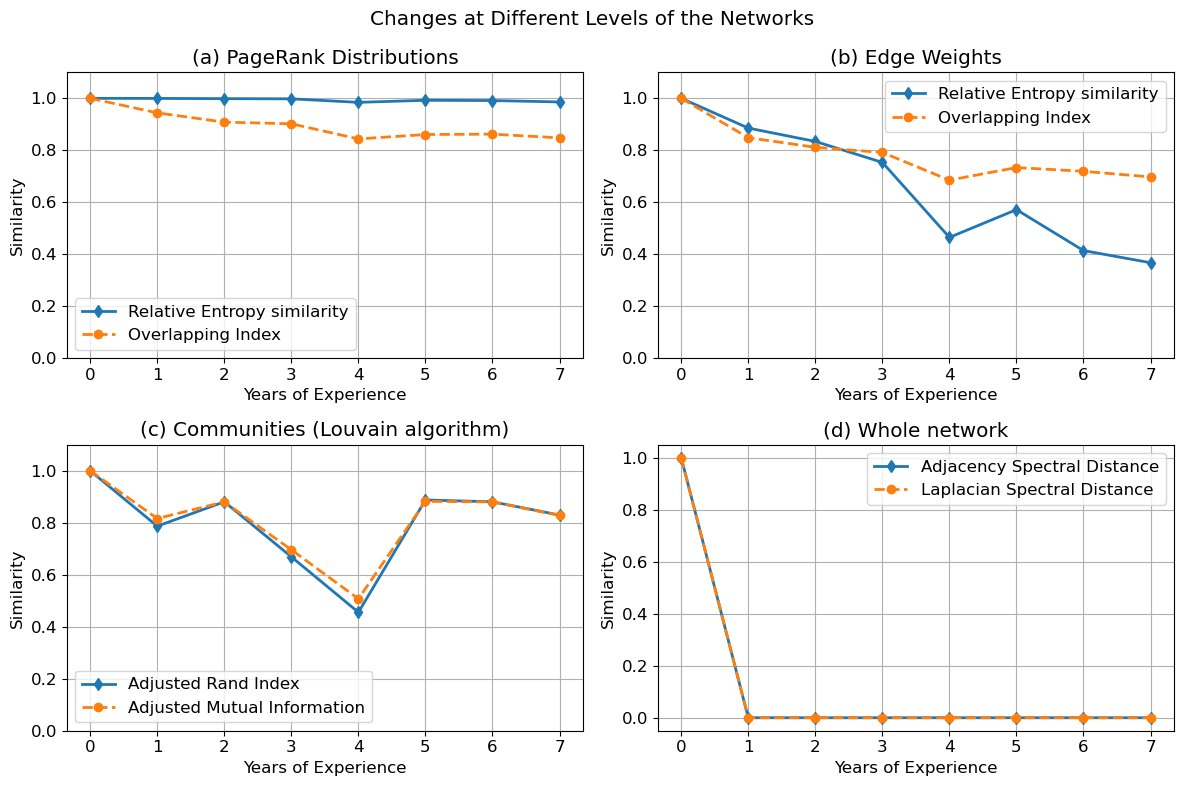

In [24]:


## -------------- Plotting ----------------

fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# 1. PageRank

# ax1.plot(del_pagerank_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax1.plot(np.exp((-1)*del_pagerank_re**2), label = r"Relative Entropy similarity", marker = "d", ls = "-", lw = 2)
ax1.plot(del_pagerank_oi, label = "Overlapping Index", marker = "o", ls = "--", lw = 2)
# ax1.plot(del_pagerank_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-", lw = 2)
ax1.set_xlabel("Years of Experience")
ax1.set_ylabel("Similarity")
ax1.set_title("(a) PageRank Distributions")
ax1.set_ylim([0., 1.1])
ax1.legend()
ax1.grid(True)

# 2 Edges

# ax2t = ax2.twinx()
# ax2t.plot(del_edge_weights_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
# # ax2.plot(np.exp((-1)*del_edge_weights_re), label = r"Relative Entropy similarity", marker = "d", ls = "--", lw = 2)
# ax2t.plot(del_edge_weights_oi, label = "Overlapping Index", marker = "o", ls = "--", lw = 2)
# # ax2.plot(del_edge_weights_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# # ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)

# ax2.plot(del_edge_bet_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax2.plot(np.exp((-1)*del_edge_weights_re**2), label = r"Relative Entropy similarity", marker = "d", ls = "-", lw = 2)
ax2.plot(del_edge_weights_oi, label = "Overlapping Index", marker = "o", ls = "--", lw = 2)
# ax2.plot(del_edge_bet_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)
ax2.set_xlabel("Years of Experience")
ax2.set_ylabel("Similarity")
ax2.set_title("(b) Edge Weights")
ax2.set_ylim([0., 1.1])
ax2.legend()
ax2.grid(True)

# 3. Communities
ax3.plot(del_communities_ari, label = "Adjusted Rand Index", marker = "d", ls = "-", lw = 2)
ax3.plot(del_communities_ami, label = "Adjusted Mutual Information", marker = "o", ls = "--", lw = 2)
ax3.set_xlabel("Years of Experience")
ax3.set_ylabel("Similarity")
ax3.set_title("(c) Communities (Louvain algorithm)")
ax3.set_ylim([0., 1.1])
ax3.legend()
ax3.grid(True)

# 4. Whole Network
ax4.plot(np.exp(-del_whole_networks_adjacency**2), label = "Adjacency Spectral Distance", marker = "d", ls = "-", lw = 2)
ax4.plot(np.exp(-del_whole_networks_laplacian**2), label = "Laplacian Spectral Distance", marker = "o", ls = "--", lw = 2)
# ax4.plot(np.exp(-del_whole_networks_normalized_laplacian**2), label = "normalized_laplacian_spectral_distance", marker = "o", ls = "--", lw = 2)
ax4.set_xlabel("Years of Experience")
ax4.set_ylabel("Similarity")
ax4.set_title("(d) Whole network")
ax4.legend()
ax4.grid(True)

plt.suptitle("Changes at Different Levels of the Networks")
plt.tight_layout()
plt.savefig("Figs/SIMILARITY_MEASURES_Timeseries_Changes_with_level_of_experience.png", dpi = 300)
plt.show()
plt.close()
# plot_network_measures(G_gx, adj_matrix_gx, title_to_set = "Group x")

#### All changes thru DISTANCE (lower lim = 0, upper lim = $\infty$)

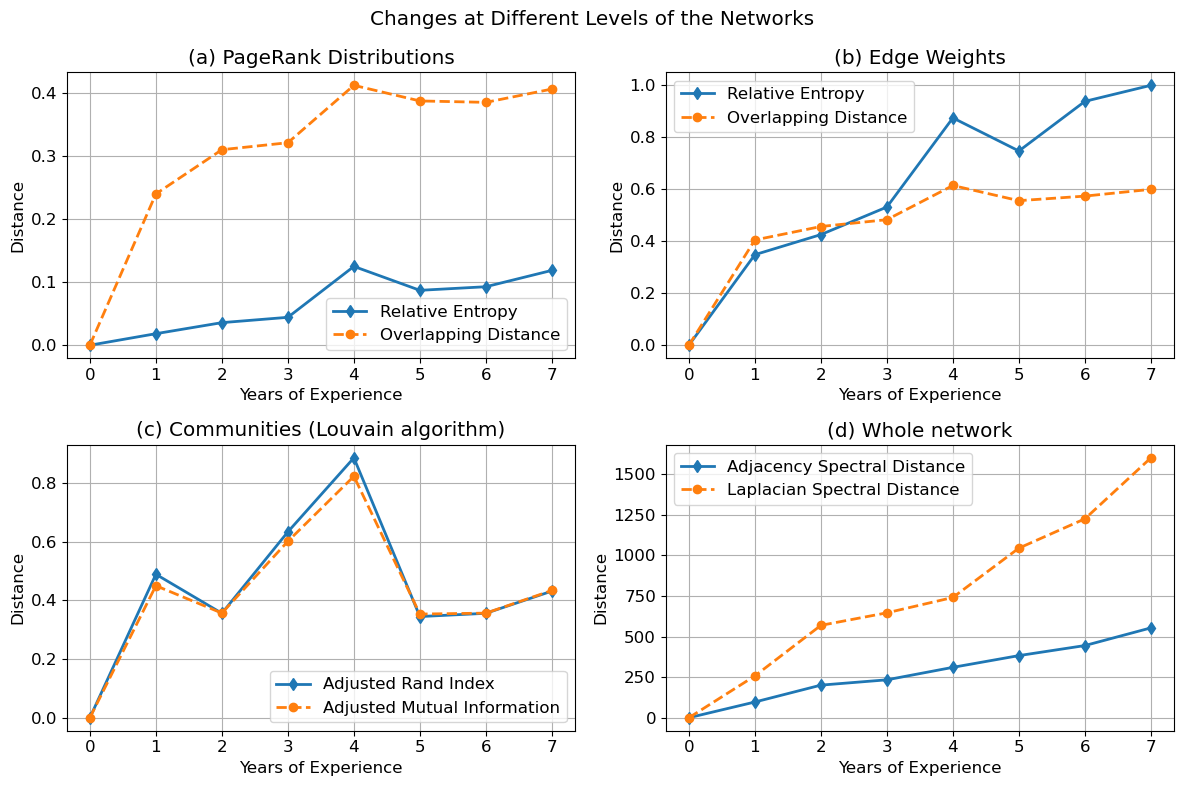

In [25]:

## -------------- Plotting ----------------

fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# 1. PageRank

# ax1.plot(del_pagerank_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax1.plot(del_pagerank_re, label = r"Relative Entropy", marker = "d", ls = "-", lw = 2)
ax1.plot(np.sqrt(-np.log(del_pagerank_oi)), label = "Overlapping Distance", marker = "o", ls = "--", lw = 2)
# ax1.plot(del_pagerank_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-", lw = 2)
ax1.set_xlabel("Years of Experience")
ax1.set_ylabel("Distance")
ax1.set_title("(a) PageRank Distributions")
# ax1.set_ylim([0., 1.1])
ax1.legend()
ax1.grid(True)

# 2 Edges

# ax2t = ax2.twinx()
# ax2t.plot(del_edge_weights_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
# # ax2.plot(2**((-1)*del_edge_weights_re), label = r"Relative Entropy similarity", marker = "d", ls = "--", lw = 2)
# ax2t.plot(del_edge_weights_oi, label = "Overlapping Index", marker = "o", ls = "--", lw = 2)
# # ax2.plot(del_edge_weights_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# # ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)

# ax2.plot(del_edge_bet_bc, label = "Bhattacharyya Coefficient", marker = "d", ls = "-", lw = 2)
ax2.plot(del_edge_weights_re, label = r"Relative Entropy", marker = "d", ls = "-", lw = 2)
ax2.plot(np.sqrt(-np.log(del_edge_weights_oi)), label = "Overlapping Distance", marker = "o", ls = "--", lw = 2)
# ax2.plot(del_edge_bet_dsRR, label = "Dist Similarity, RR", marker = "d", ls = "-.", lw = 2)
# ax2.plot(del_ed..., label = "", marker = "o", ls = "--", lw = 2)
ax2.set_xlabel("Years of Experience")
ax2.set_ylabel("Distance")
ax2.set_title("(b) Edge Weights")
# ax2.set_ylim([0., 1.1])
ax2.legend()
ax2.grid(True)

# 3. Communities
ax3.plot(np.sqrt(-np.log(del_communities_ari)), label = "Adjusted Rand Index", marker = "d", ls = "-", lw = 2)
ax3.plot(np.sqrt(-np.log(del_communities_ami)), label = "Adjusted Mutual Information", marker = "o", ls = "--", lw = 2)
ax3.set_xlabel("Years of Experience")
ax3.set_ylabel("Distance")
ax3.set_title("(c) Communities (Louvain algorithm)")
# ax3.set_ylim([0., 1.1])
ax3.legend()
ax3.grid(True)

# 4. Whole Network
ax4.plot(del_whole_networks_adjacency, label = "Adjacency Spectral Distance", marker = "d", ls = "-", lw = 2)
ax4.plot(del_whole_networks_laplacian, label = "Laplacian Spectral Distance", marker = "o", ls = "--", lw = 2)
# ax4.plot(np.exp(-del_whole_networks_normalized_laplacian**2), label = "normalized_laplacian_spectral_distance", marker = "o", ls = "--", lw = 2)
ax4.set_xlabel("Years of Experience")
ax4.set_ylabel("Distance")
ax4.set_title("(d) Whole network")
ax4.legend()
ax4.grid(True)

plt.suptitle("Changes at Different Levels of the Networks")
plt.tight_layout()
plt.savefig("Figs/DISTANCE_MEASURES_Timeseries_Changes_with_level_of_experience.png", dpi = 300)
plt.show()
plt.close()
# plot_network_measures(G_gx, adj_matrix_gx, title_to_set = "Group x")

<!-- FOR FUTURE -->
<!-- ## PageRank Changes by Communities -->
<!-- -- Instead of PageRanks and Weights 
    <!-- Subtasks and Interconnections -->

<!-- -- We keep the distances in the main paper

-- Random changes: Some things that SHOULD NOT CHANGE WITH EXPERTISE --> -->